<a href="https://colab.research.google.com/github/Khang2561/Intrusion-detection-using-DL-and-MC/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#1. READ FILE

In [123]:
#đọc dữ liệu file train và test
#train
path = "/content/drive/MyDrive/Project/intruction_detection_project/kdd_train.csv"
train_df = pd.read_csv(path)

#test
path = "/content/drive/MyDrive/Project/intruction_detection_project/kdd_test.csv"
test_df = pd.read_csv(path)

In [124]:
#tên các cột có trong bảng
train_df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'labels'],
      dtype='object')

In [125]:
print(train_df['labels'].unique())
print(test_df['labels'].unique())

['normal' 'neptune' 'warezclient' 'ipsweep' 'portsweep' 'teardrop' 'nmap'
 'satan' 'smurf' 'pod' 'back' 'guess_passwd' 'ftp_write' 'multihop'
 'rootkit' 'buffer_overflow' 'imap' 'warezmaster' 'phf' 'land'
 'loadmodule' 'spy' 'perl']
['normal' 'portsweep' 'neptune' 'smurf' 'satan' 'apache2' 'teardrop'
 'guess_passwd' 'ipsweep' 'warezclient' 'nmap' 'warezmaster' 'mscan'
 'back' 'pod' 'httptunnel' 'processtable' 'mailbomb' 'snmpguess' 'saint'
 'multihop' 'snmpgetattack' 'buffer_overflow' 'xsnoop' 'imap' 'ps'
 'rootkit' 'land' 'xterm' 'sendmail' 'phf' 'loadmodule' 'perl' 'xlock'
 'ftp_write' 'named']


In [126]:
#tên các col có trong bảng
test_df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'labels'],
      dtype='object')

####duration: Thời gian trôi qua giữa gói tin đầu tiên và gói tin cuối cùng của một kết nối.
####protocol_type(category): Loại giao thức được sử dụng trong một kết nối. Ví dụ: TCP, UDP, ICMP, ...
####service(category): Dịch vụ được sử dụng trong một kết nối. Ví dụ: http, ftp, ssh, ...
####flag(category): Các cờ được sử dụng trong một gói tin. Ví dụ: SYN, ACK, FIN, ...
####src_bytes: Số byte được gửi từ máy chủ nguồn sang máy chủ đích.
####dst_bytes: Số byte được gửi từ máy chủ đích sang máy chủ nguồn.
####land(category): Chỉ ra liệu máy chủ nguồn và máy chủ đích có cùng địa chỉ IP hay không.
####wrong_fragment(category): Chỉ ra liệu gói tin có được phân mảnh một cách không chính xác hay không.
####urgent(category): Chỉ ra liệu gói tin có chứa dữ liệu khẩn cấp hay không.
####hot: Chỉ ra liệu kết nối có được sử dụng nhiều hay không.
####num_failed_logins: Số lần đăng nhập thất bại.
####logged_in(category): Chỉ ra liệu người dùng đã đăng nhập thành công hay không.
####num_compromised: Số lượng tài khoản bị xâm phạm.
####root_shell(category): Chỉ ra liệu kẻ tấn công có quyền truy cập root hay không.
####su_attempted(category): Chỉ ra liệu kẻ tấn công có cố gắng sử dụng lệnh su để nâng cao quyền truy cập hay không.
####num_root: Số lượng tài khoản root.
####num_file_creations: Số lượng tệp tin được tạo.
####num_shells: Số lượng shell được mở.
####num_access_files: Số lượng tệp tin được truy cập.
####num_outbound_cmds(xoa): Số lượng lệnh được gửi đi.
####is_host_login(xoa): Chỉ ra liệu kết nối có được sử dụng để đăng nhập vào máy chủ đích hay không.
####is_guest_login(category): Chỉ ra liệu kết nối có được sử dụng để đăng nhập với tư cách khách mời hay không.
####count: Số lượng kết nối.
####srv_count: Số lượng kết nối đến cùng một dịch vụ.
####serror_rate: Tỷ lệ các kết nối bị lỗi.
####srv_serror_rate: Tỷ lệ các kết nối đến cùng một dịch vụ bị lỗi.
####rerror_rate: Tỷ lệ các kết nối bị từ chối.
####srv_rerror_rate: Tỷ lệ các kết nối đến cùng một dịch vụ bị từ chối.
####same_srv_rate: Tỷ lệ các kết nối đến cùng một dịch vụ.
####diff_srv_rate: Tỷ lệ các kết nối đến các dịch vụ khác nhau.
####srv_diff_host_rate: Tỷ lệ các kết nối đến các máy chủ khác nhau.
####dst_host_count: Số lượng kết nối đến cùng một máy chủ đích.
####dst_host_srv_count: Số lượng kết nối đến cùng một dịch vụ trên cùng một máy chủ đích.
####dst_host_same_srv_rate: Tỷ lệ các kết nối đến cùng một dịch vụ trên cùng một máy chủ đích.
####dst_host_diff_srv_rate: Tỷ lệ các kết nối đến các dịch vụ khác nhau trên cùng một máy chủ đích.
####dst_host_same_src_port_rate: Tỷ lệ các kết nối đến cùng một máy chủ đích với cùng một cổng nguồn.
####dst_host_srv_diff_host_rate: Tỷ lệ các kết nối đến cùng một dịch vụ trên các máy chủ đích khác nhau.
####dst_host_serror_rate: Tỷ lệ các kết nối đến cùng một máy chủ đích bị lỗi.
####dst_host_srv_serror_rate: Tỷ lệ các kết nối đến cùng một dịch vụ trên cùng một máy chủ đích bị lỗi.
####dst_host_rerror_rate: Tỷ lệ các kết nối đến cùng một máy chủ đích bị từ chối.
####dst_host_srv_rerror_rate: Tỷ lệ các kết nối đến cùng một dịch vụ trên cùng một máy chủ đích bị từ chối.
####labels(category): Nhãn của kết nối. Nhãn này có thể được sử dụng để phân loại kết nối là bình thường hay bất thường.

In [127]:
#xuất bảng
train_df.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
5,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune
6,0,tcp,private,S0,0,0,0,0,0,0,...,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
7,0,tcp,private,S0,0,0,0,0,0,0,...,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,neptune
8,0,tcp,remote_job,S0,0,0,0,0,0,0,...,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
9,0,tcp,private,S0,0,0,0,0,0,0,...,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune


In [128]:
#xuất bảng test
test_df.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,5,tcp,smtp,SF,2429,475,0,0,0,0,...,57,0.11,0.02,0.01,0.04,0.00,0.0,0.87,0.0,normal
1,0,udp,domain_u,SF,45,134,0,0,0,0,...,155,0.80,0.02,0.01,0.00,0.00,0.0,0.00,0.0,normal
2,0,udp,domain_u,SF,45,80,0,0,0,0,...,255,1.00,0.00,0.01,0.00,0.00,0.0,0.00,0.0,normal
3,1979,udp,other,SF,145,105,0,0,0,0,...,2,0.01,0.84,1.00,0.00,0.00,0.0,0.00,0.0,normal
4,14462,tcp,other,RSTR,1,0,0,0,0,0,...,2,0.01,0.68,1.00,0.00,0.00,0.0,1.00,1.0,portsweep
5,0,tcp,private,S0,0,0,0,0,0,0,...,9,0.04,0.07,0.00,0.00,1.00,1.0,0.00,0.0,neptune
6,0,tcp,http,SF,294,5499,0,0,0,0,...,255,1.00,0.00,0.50,0.04,0.00,0.0,0.00,0.0,normal
7,0,tcp,http,S0,0,0,0,0,0,0,...,44,0.17,0.03,0.01,0.00,1.00,1.0,0.00,0.0,neptune
8,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.00,0.0,0.00,0.0,smurf
9,0,udp,private,SF,1,0,0,0,0,0,...,32,0.13,0.45,0.66,0.00,0.03,0.0,0.31,0.0,satan


In [129]:
#định dạng của bảng
train_df.shape

(125973, 42)

In [130]:
#định dạng của bảng test
test_df.shape

(22544, 42)

In [131]:
#info data columns
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [132]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

In [133]:


def Value_union(train_df, name_column):
  return train_df[name_column].value_counts()

# Tạo một danh sách các tên cột cần tính toán.
name_columns = list(train_df.columns)

# Tính toán giá trị không lặp lại của từng cột và lưu vào một biến.
value_unions = {}
for name_column in name_columns:
  value_unions[name_column] = Value_union(train_df, name_column)

# In giá trị không lặp lại của từng cột.
for name_column, value_union in value_unions.items():
  print(f"Giá trị không lặp lại của cột {name_column}:\n{value_union}")
  print("\n------------------------------------------------------------------------------------------")


Giá trị không lặp lại của cột duration:
0        115955
1          1989
2           843
3           557
4           351
          ...  
4946          1
5284          1
20771         1
3294          1
679           1
Name: duration, Length: 2981, dtype: int64

------------------------------------------------------------------------------------------
Giá trị không lặp lại của cột protocol_type:
tcp     102689
udp      14993
icmp      8291
Name: protocol_type, dtype: int64

------------------------------------------------------------------------------------------
Giá trị không lặp lại của cột service:
http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6860
             ...  
tftp_u           3
http_8001        2
aol              2
harvest          2
http_2784        1
Name: service, Length: 70, dtype: int64

------------------------------------------------------------------------------------------
Giá trị không lặp lại của cột flag:
SF        74945
S

In [134]:
#Tìm giá trị null
train_df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

#2. CLEAN DATA


In [135]:
#Phân loại những data có kiểu category
#change Dtype
features = ["protocol_type","service","flag","land","wrong_fragment","is_host_login","urgent","logged_in","root_shell","su_attempted","is_guest_login","labels"]
def convert_cat(df,features) :
  for feature in features :
    df[feature] = df[feature].astype("category")
convert_cat(train_df, features)
convert_cat(test_df, features)

In [136]:
#xóa những cột không quá ảnh hưởng đến bài trên train_df
train_df = train_df.drop(labels ='num_outbound_cmds',axis = 1)
train_df = train_df.drop(labels ='is_host_login',axis = 1)


In [137]:
train_df.shape

(125973, 40)

In [138]:
#xóa những cột không quá ảnh hưởng đến bài trên test_df
test_df = test_df.drop(labels ='num_outbound_cmds',axis = 1)
test_df = test_df.drop(labels ='is_host_login',axis = 1)

In [139]:
test_df.shape

(22544, 40)

In [140]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 40 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   duration                     125973 non-null  int64   
 1   protocol_type                125973 non-null  category
 2   service                      125973 non-null  category
 3   flag                         125973 non-null  category
 4   src_bytes                    125973 non-null  int64   
 5   dst_bytes                    125973 non-null  int64   
 6   land                         125973 non-null  category
 7   wrong_fragment               125973 non-null  category
 8   urgent                       125973 non-null  category
 9   hot                          125973 non-null  int64   
 10  num_failed_logins            125973 non-null  int64   
 11  logged_in                    125973 non-null  category
 12  num_compromised              125973 non-null

In [141]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   duration                     22544 non-null  int64   
 1   protocol_type                22544 non-null  category
 2   service                      22544 non-null  category
 3   flag                         22544 non-null  category
 4   src_bytes                    22544 non-null  int64   
 5   dst_bytes                    22544 non-null  int64   
 6   land                         22544 non-null  category
 7   wrong_fragment               22544 non-null  category
 8   urgent                       22544 non-null  category
 9   hot                          22544 non-null  int64   
 10  num_failed_logins            22544 non-null  int64   
 11  logged_in                    22544 non-null  category
 12  num_compromised              22544 non-null  int64   
 13  r

In [142]:
#statistics age,fare column
train_df.describe()

,duration,src_bytes,dst_bytes,hot,num_failed_logins,num_compromised,num_root,num_file_creations,num_shells,num_access_files,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.204409,0.001222,0.279250,0.302192,0.012669,0.000413,0.004096,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,2.149968,0.045239,23.942042,24.399618,0.483935,0.022181,0.099370,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,77.000000,5.000000,7479.000000,7468.000000,43.000000,2.000000,9.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [143]:
# category column statistic
train_df.describe(include = ['category'])

,protocol_type,service,flag,land,wrong_fragment,urgent,logged_in,root_shell,su_attempted,is_guest_login,labels
count,125973,125973,125973,125973,125973,125973,125973,125973,125973,125973,125973
unique,3,70,11,2,3,4,2,2,3,2,23
top,tcp,http,SF,0,0,0,0,0,0,0,normal
freq,102689,40338,74945,125948,124883,125964,76121,125804,125893,124786,67343


In [144]:
temp = train_df['service'].unique()
temp

['ftp_data', 'other', 'private', 'http', 'remote_job', ..., 'http_8001', 'aol', 'http_2784', 'tftp_u', 'harvest']
Length: 70
Categories (70, object): ['IRC', 'X11', 'Z39_50', 'aol', ..., 'uucp', 'uucp_path', 'vmnet', 'whois']

In [145]:
#percent file label
train_df["labels"].value_counts(normalize = 'True').to_frame()*100

,labels
normal,53.458281
neptune,32.716534
satan,2.883951
ipsweep,2.856961
portsweep,2.326689
smurf,2.100450
nmap,1.185175
back,0.758893
teardrop,0.708088
warezclient,0.706501


In [146]:
label_better_1 = ["normal","neptune","satan","ipsweep","portsweep","smurf","nmap"]
train_df_labels_1 = list(train_df['labels'].unique())
train_df_labels_1 = set(train_df_labels_1) - set(label_better_1)
train_df_labels_1

test_df_labels_1 = list(test_df['labels'].unique())
test_df_labels_1 = set(test_df_labels_1) - set(label_better_1)
test_df_labels_1

#train_df.loc[label_under_1, ['labels']] ='other'
train_df['labels'] = train_df['labels'].replace(train_df_labels_1, 'other')
#train_df
test_df['labels'] = test_df['labels'].replace(test_df_labels_1, 'other')


In [147]:
train_df["labels"].value_counts(normalize = 'True').to_frame()*100


,labels
normal,53.458281
neptune,32.716534
satan,2.883951
ipsweep,2.856961
other,2.471958
portsweep,2.326689
smurf,2.100450
nmap,1.185175


In [148]:
test_df["labels"].value_counts(normalize = 'True').to_frame()*100

,labels
normal,49.880234
neptune,29.515614
other,10.428495
satan,3.096167
smurf,2.395316
ipsweep,2.124734
portsweep,1.645671
nmap,0.913769


In [149]:
train_df['labels'].unique()


['normal', 'neptune', 'other', 'ipsweep', 'portsweep', 'nmap', 'satan', 'smurf']
Categories (8, object): ['other', 'ipsweep', 'neptune', 'nmap', 'normal', 'portsweep', 'satan',
                         'smurf']

In [150]:
test_df['labels'].unique()


['normal', 'portsweep', 'neptune', 'smurf', 'satan', 'other', 'ipsweep', 'nmap']
Categories (8, object): ['ipsweep', 'neptune', 'nmap', 'normal', 'portsweep', 'satan', 'smurf',
                         'other']

In [151]:
unique_labels = set(train_df['labels'])

labels = list(unique_labels)

print(labels)

['normal', 'other', 'smurf', 'satan', 'neptune', 'portsweep', 'nmap', 'ipsweep']


#####(o)IMAP: IMAP (Internet Message Access Protocol) là một giao thức truy cập thư điện tử cho phép người dùng truy cập và quản lý thư điện tử của họ từ xa. IMAP được sử dụng bởi nhiều ứng dụng email phổ biến, chẳng hạn như Gmail, Outlook, và Thunderbird.
#####Port sweep: Port sweep là một kỹ thuật tấn công mạng được sử dụng để xác định các cổng mở trên một máy tính hoặc mạng. Port sweep có thể được sử dụng để tìm kiếm các lỗ hổng bảo mật trên máy tính hoặc mạng mục tiêu.
#####Satan: Satan là một công cụ quét lỗ hổng bảo mật mạng được phát triển bởi Phineas Phisher. Satan có thể được sử dụng để tìm kiếm các lỗ hổng bảo mật trên máy tính hoặc mạng mục tiêu.
#####Phf: Phf (Password Hacker Framework) là một công cụ tấn công mạng được sử dụng để bẻ khóa mật khẩu. Phf có thể sử dụng nhiều phương pháp khác nhau để bẻ khóa mật khẩu, chẳng hạn như tấn công từ điển, tấn công brute-force, và tấn công rainbow table.
#####Buffer overflow: Buffer overflow là một loại lỗ hổng bảo mật xảy ra khi một chương trình ghi dữ liệu vào vùng nhớ vượt quá kích thước của vùng nhớ đó.
##### Buffer overflow có thể được kẻ tấn công sử dụng để thực thi mã tùy ý trên máy tính mục tiêu. 1
#####Warezclient: Warezclient là một loại phần mềm được sử dụng để tải xuống các tệp tin warez (tức là các tệp tin được chia sẻ trái phép). Warezclient thường được sử dụng để tải xuống các tệp tin như phim ảnh, trò chơi, và phần mềm.
#####Guess password: Guess password là một kỹ thuật tấn công mạng được sử dụng để đoán mật khẩu người dùng. Guess password có thể sử dụng nhiều phương pháp khác nhau để đoán mật khẩu, chẳng hạn như đoán các mật khẩu phổ biến, đoán các mật khẩu liên quan đến tên người dùng, và đoán các mật khẩu dựa trên các thông tin cá nhân của người dùng.
#####(o)Normal: Normal là một loại kết nối mạng không có dấu hiệu của tấn công.
#####Rootkit: Rootkit là một loại phần mềm độc hại được thiết kế để ẩn giấu sự tồn tại của nó trên máy tính mục tiêu. Rootkit có thể được kẻ tấn công sử dụng để chiếm quyền điều khiển máy tính mục tiêu mà không bị phát hiện.
#####Loadmodule: Loadmodule là một loại tấn công mạng được sử dụng để tải các mô-đun độc hại lên máy tính mục tiêu. Các mô-đun độc hại này có thể được sử dụng để thực hiện mã tùy ý trên máy tính mục tiêu.
#####Warezmaster: Warezmaster là một loại phần mềm được sử dụng để chia sẻ các tệp tin warez. Warezmaster thường được sử dụng để chia sẻ các tệp tin như phim ảnh, trò chơi, và phần mềm.
#####Back: Back là một loại tấn công mạng được sử dụng để gửi lại lưu lượng mạng đến máy tính mục tiêu. Back có thể được sử dụng để gây quá tải cho máy tính mục tiêu và làm cho nó không khả dụng với người dùng hợp pháp.
#####Multihop: Multihop là một loại tấn công mạng được sử dụng để gửi lưu lượng mạng qua nhiều máy tính trước khi đến máy tính mục tiêu. Multihop có thể được sử dụng để che giấu nguồn gốc của lưu lượng mạng và làm cho khó khăn hơn việc theo dõi kẻ tấn công.
#####Smurf: Smurf là một loại tấn công mạng được sử dụng để gửi các gói tin ICMP echo request đến các mạng phát sóng. Các mạng phát sóng này sau đó sẽ gửi lại các gói tin ICMP echo response đến máy tính mục tiêu, gây quá tải cho máy tính mục tiêu.
#####Spy: Spy là một loại phần mềm độc hại được thiết kế để theo dõi hoạt động của người dùng máy tính. Spy có thể được kẻ tấn công sử dụng để lấy cắp thông tin cá nhân của người dùng, chẳng hạn như mật khẩu, số tài khoản ngân hàng, và số thẻ tín dụng.
#####Land: Land là một loại tấn công mạng được gửi các gói tin TCP SYN với địa chỉ IP nguồn và địa chỉ IP đích giống nhau. Land có thể được sử dụng để gây quá tải cho máy tính mục tiêu.
#####Perl: Perl (Practical Extraction and Report Language) là một ngôn ngữ lập trình được sử dụng để phát triển các ứng dụng web, các ứng dụng dòng lệnh, và các ứng dụng khác. Perl cũng có thể được sử dụng để viết các tập lệnh tấn công mạng.1
#####(o)Pod: Pod (Plain Old Documentation) là một định dạng văn bản được sử dụng để viết tài liệu cho các chương trìnH


In [152]:
train_df.describe()

,duration,src_bytes,dst_bytes,hot,num_failed_logins,num_compromised,num_root,num_file_creations,num_shells,num_access_files,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.204409,0.001222,0.279250,0.302192,0.012669,0.000413,0.004096,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,2.149968,0.045239,23.942042,24.399618,0.483935,0.022181,0.099370,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,77.000000,5.000000,7479.000000,7468.000000,43.000000,2.000000,9.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [153]:
train_df['protocol_type'].unique()

['tcp', 'udp', 'icmp']
Categories (3, object): ['icmp', 'tcp', 'udp']

In [154]:
test_df['protocol_type'].unique()

['tcp', 'udp', 'icmp']
Categories (3, object): ['icmp', 'tcp', 'udp']

#3. Trực quan hóa dữ liệu

<ipython-input-155-16292a85aa6d>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_mean = train_df.groupby(by='labels').mean()
<ipython-input-155-16292a85aa6d>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(16,5));


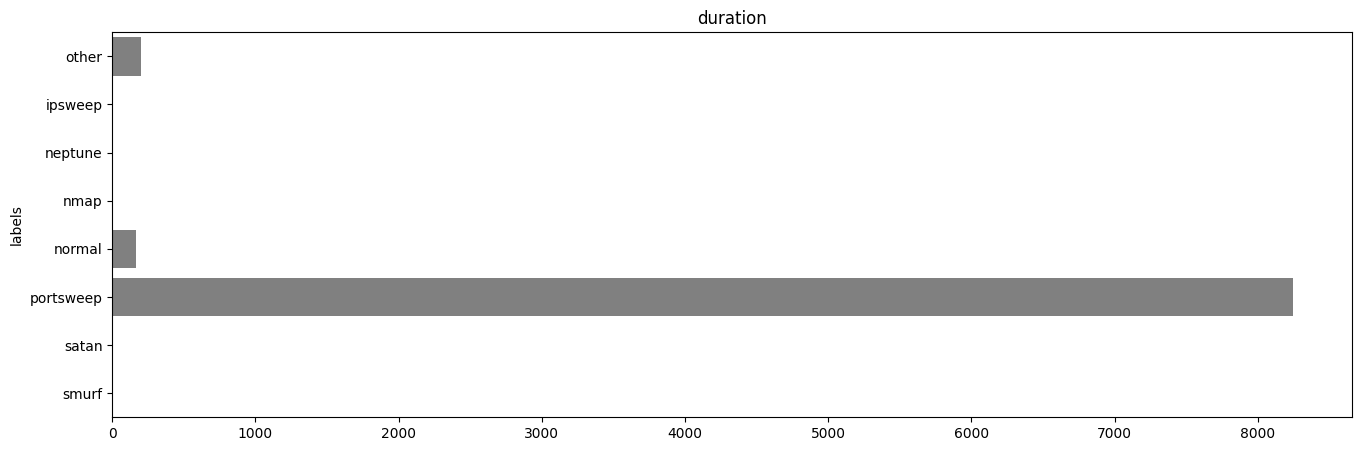

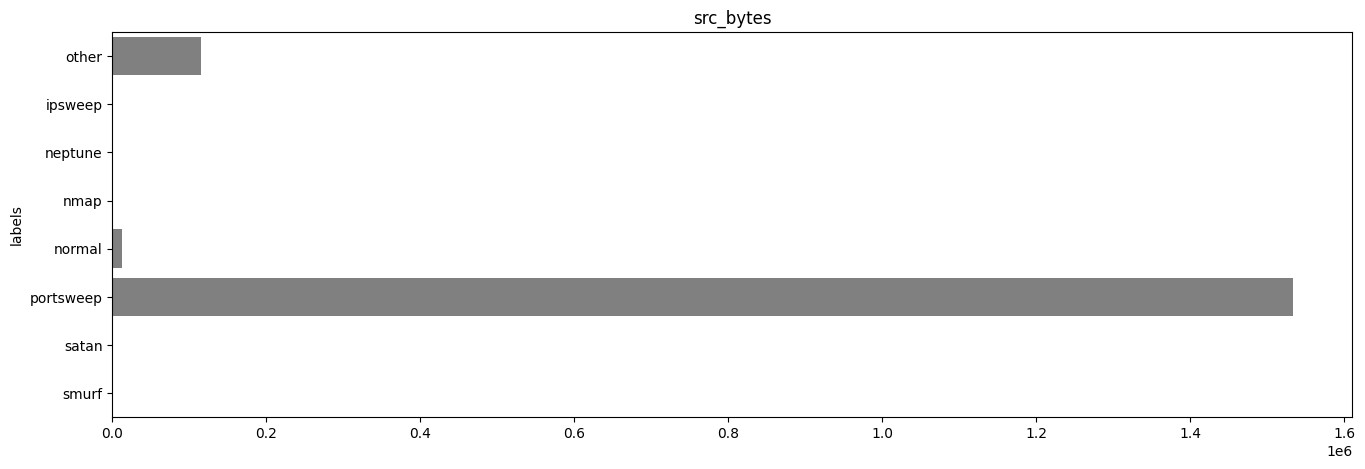

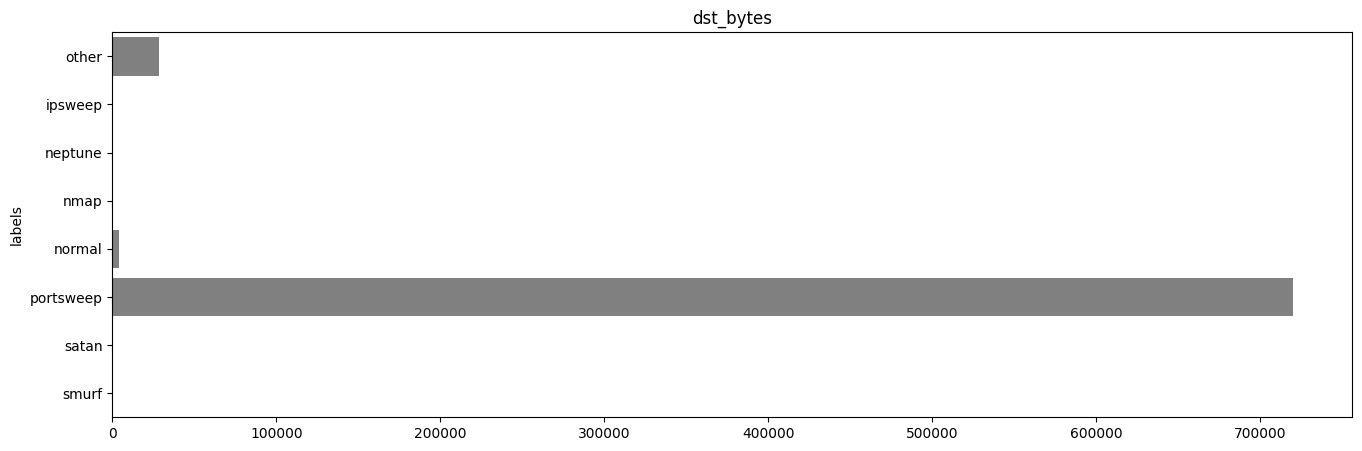

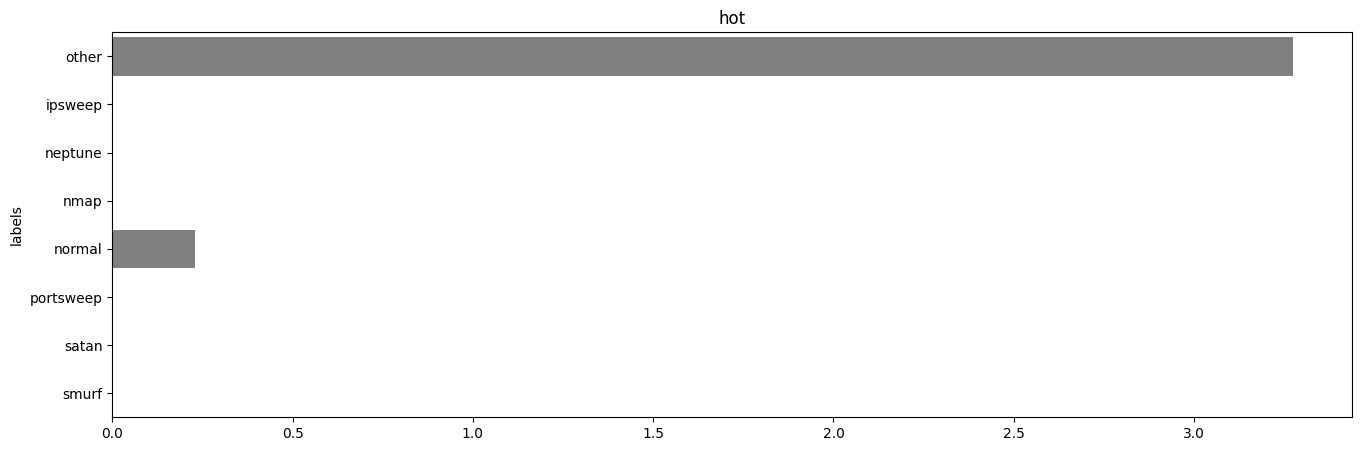

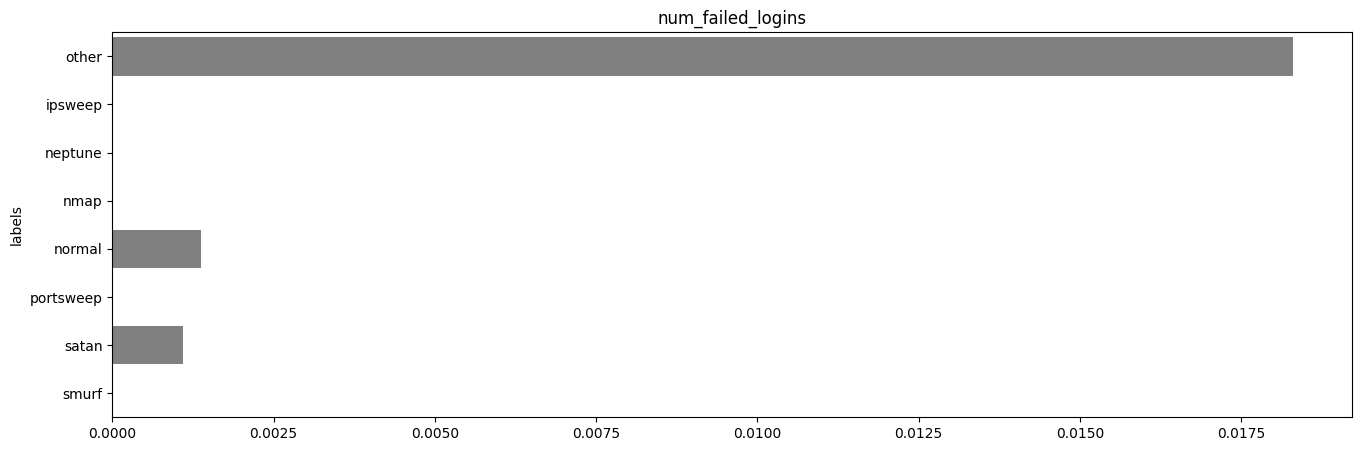

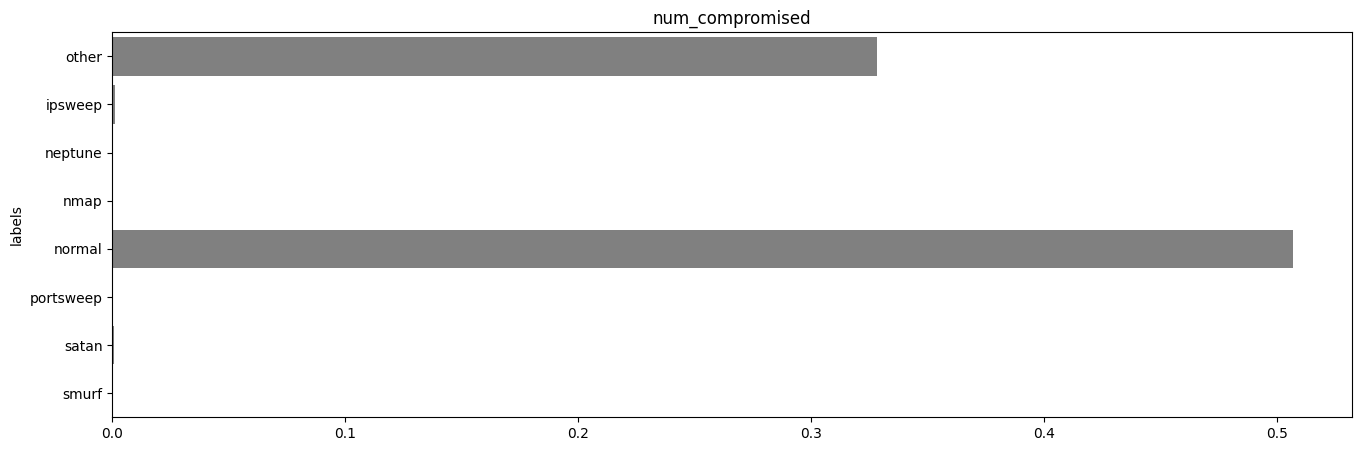

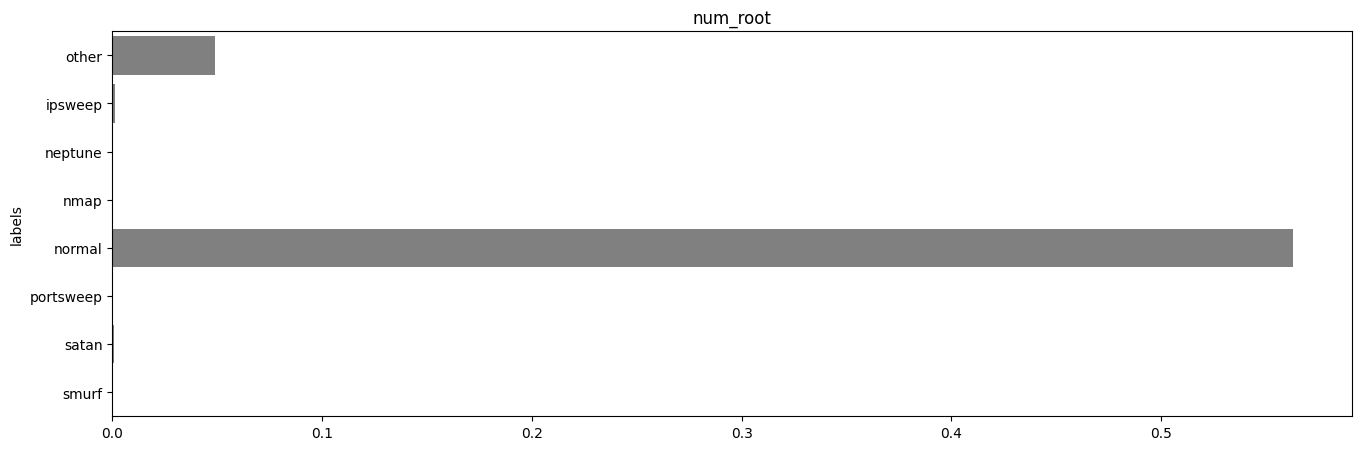

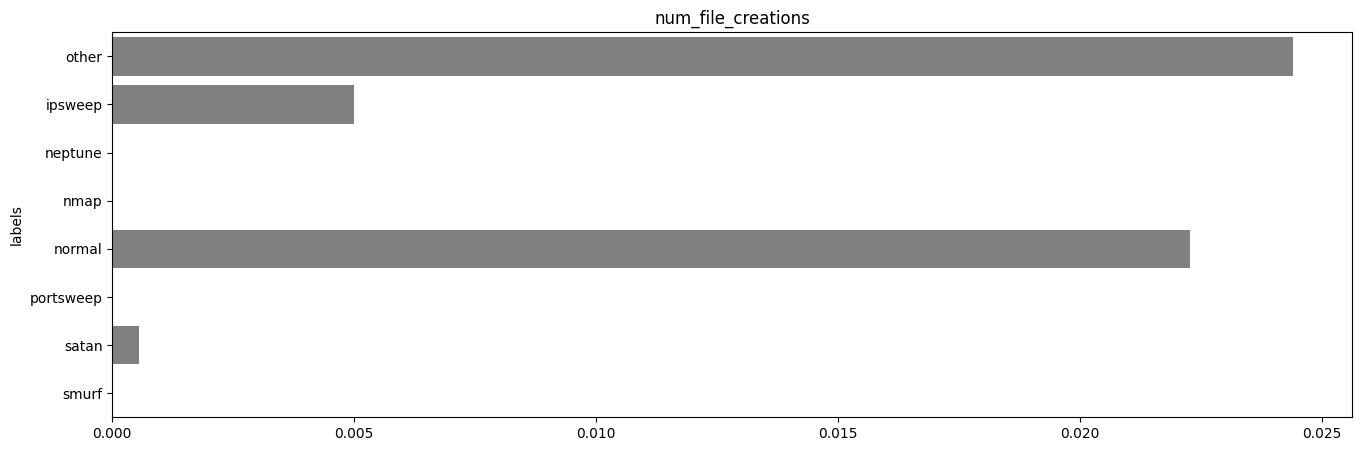

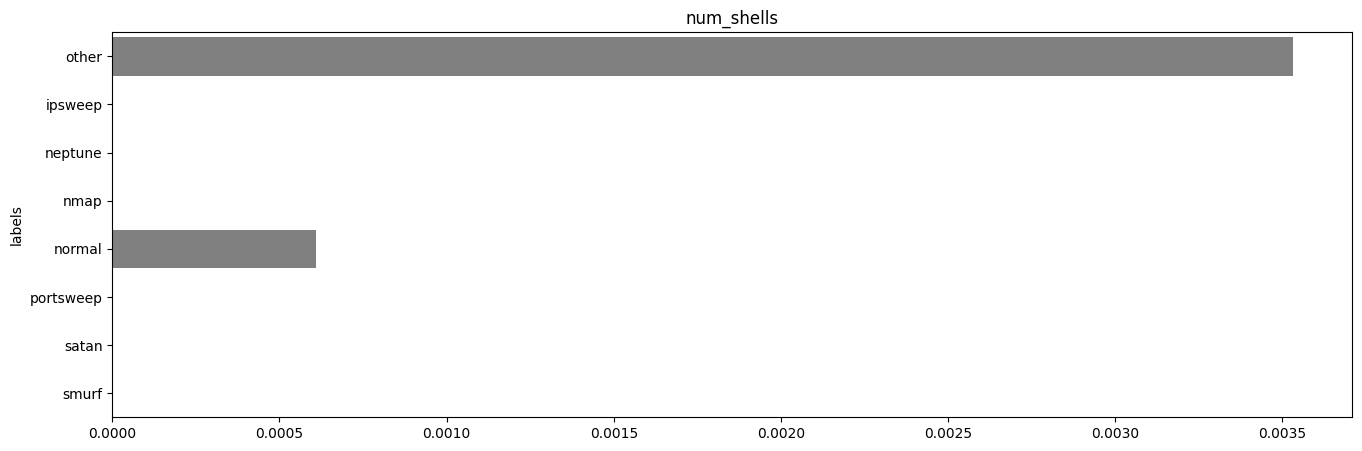

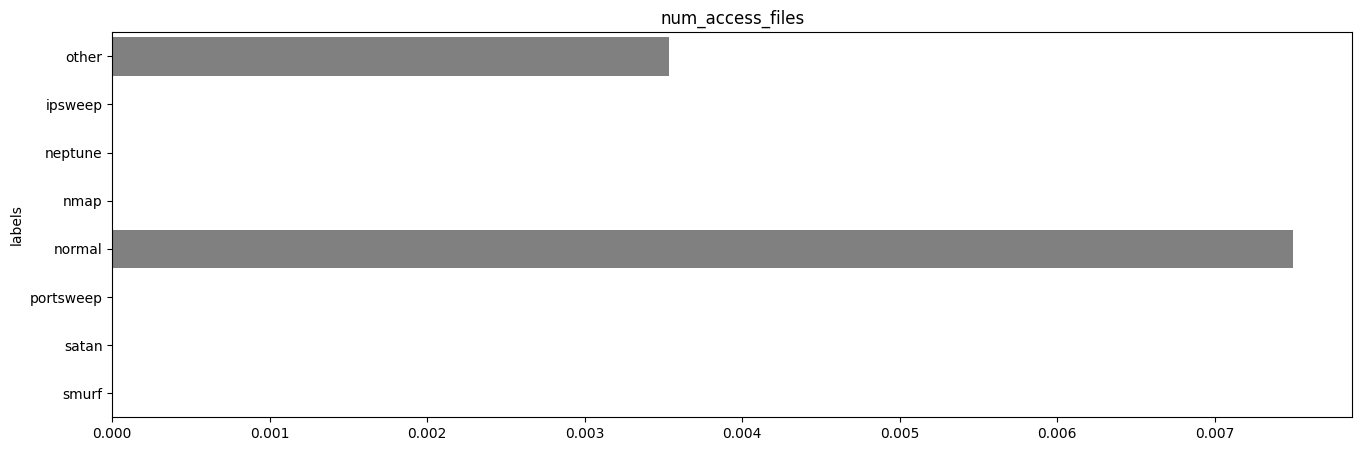

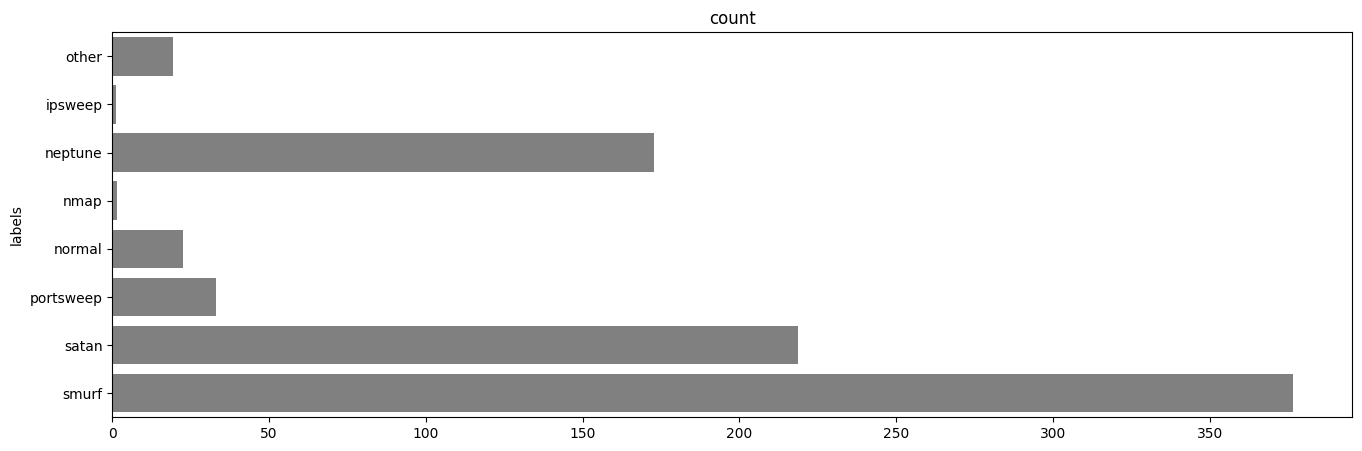

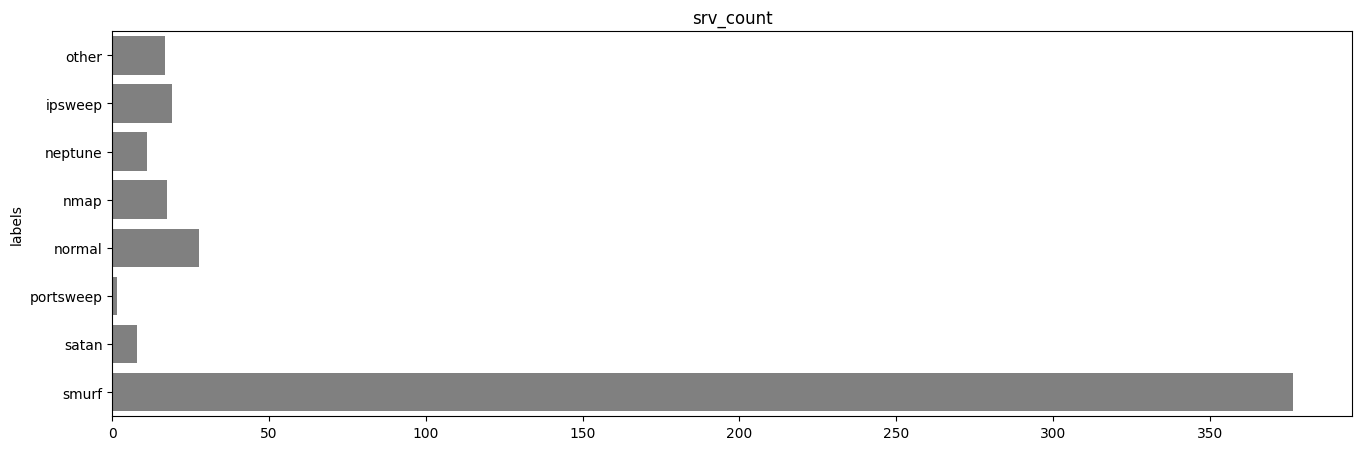

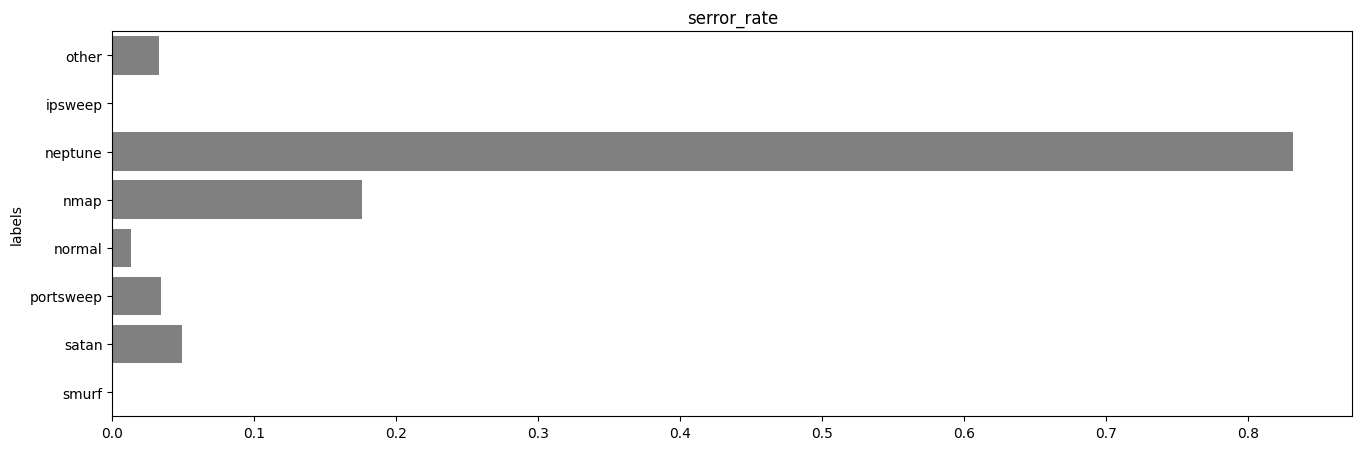

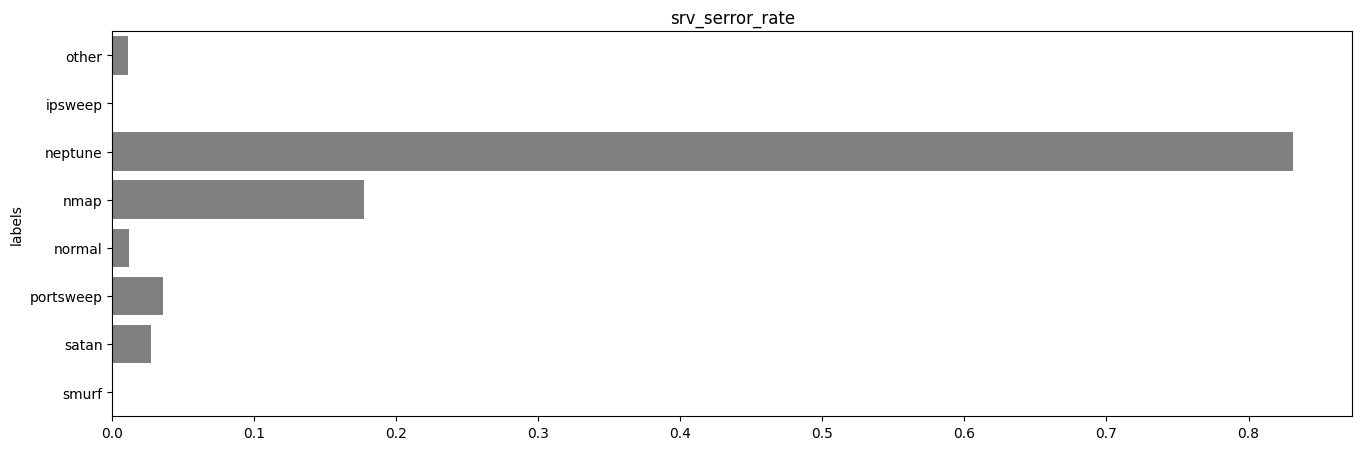

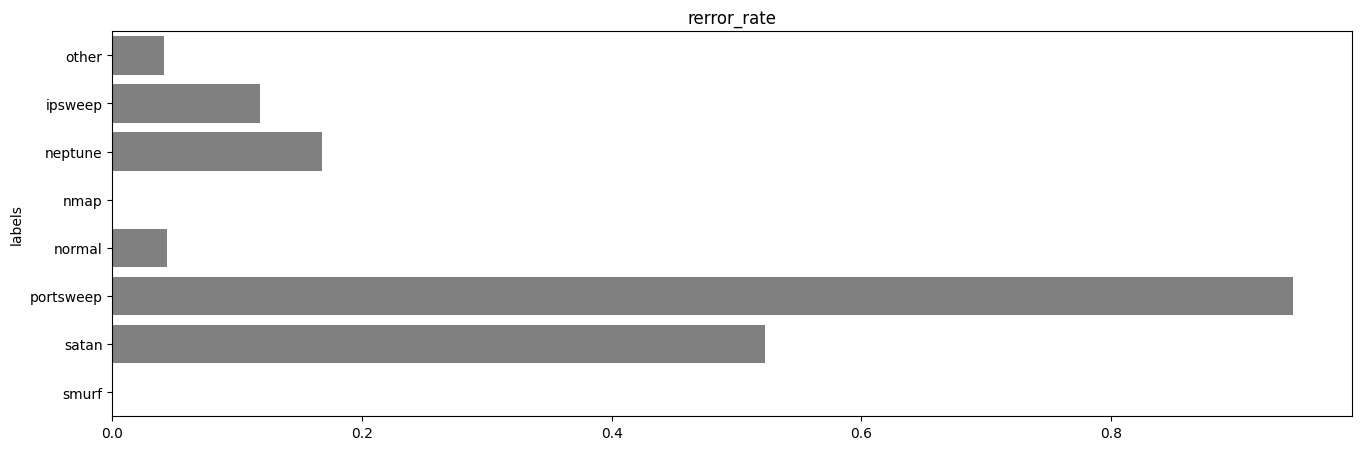

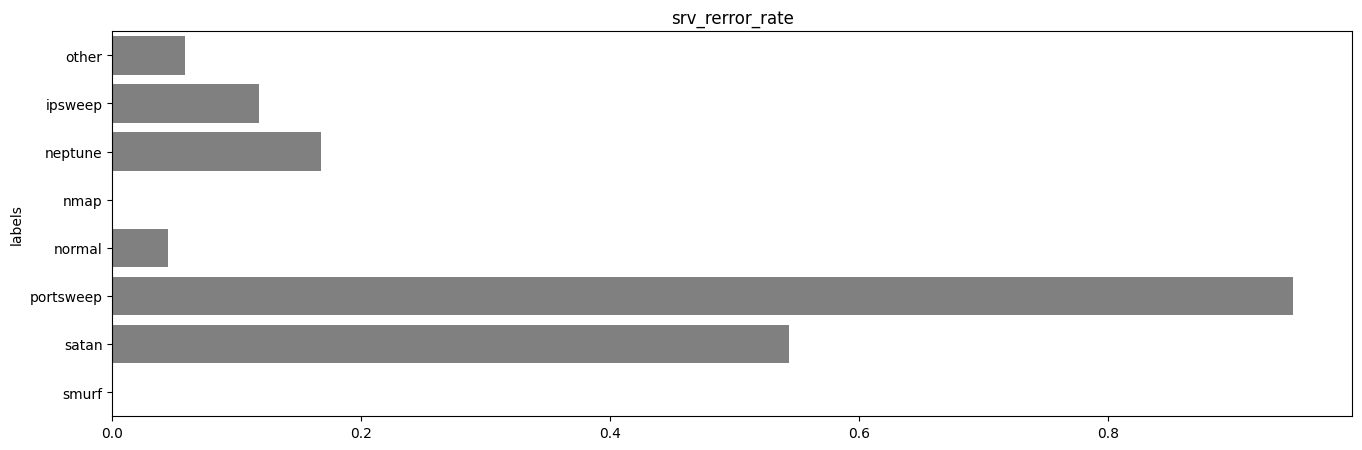

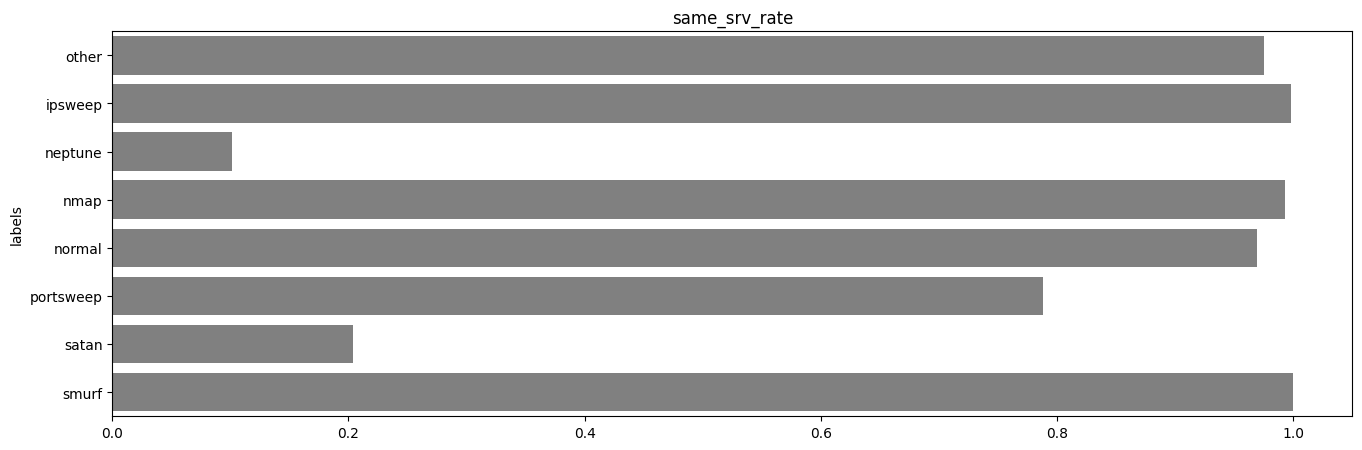

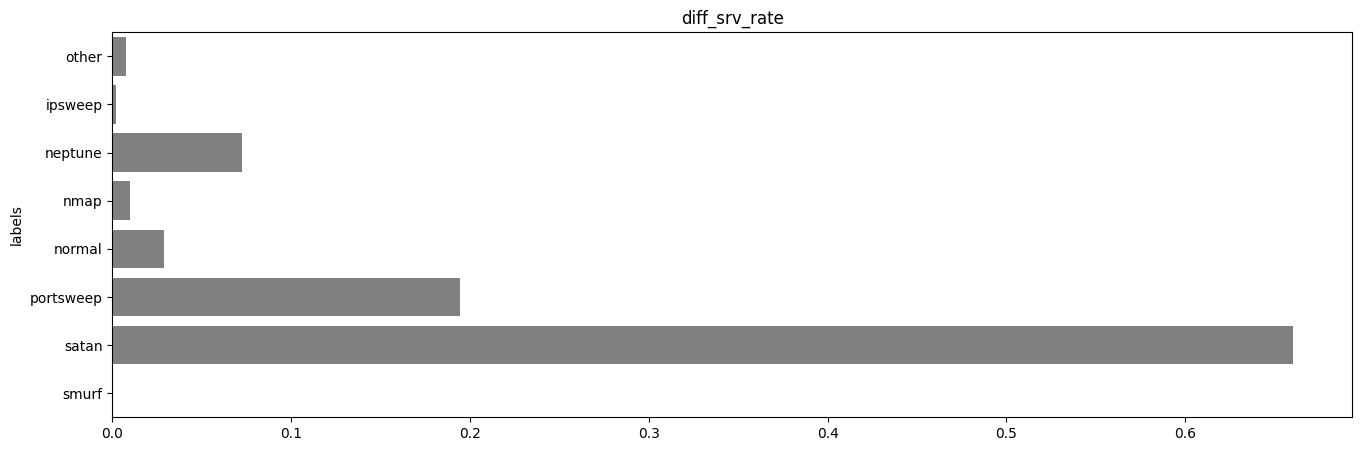

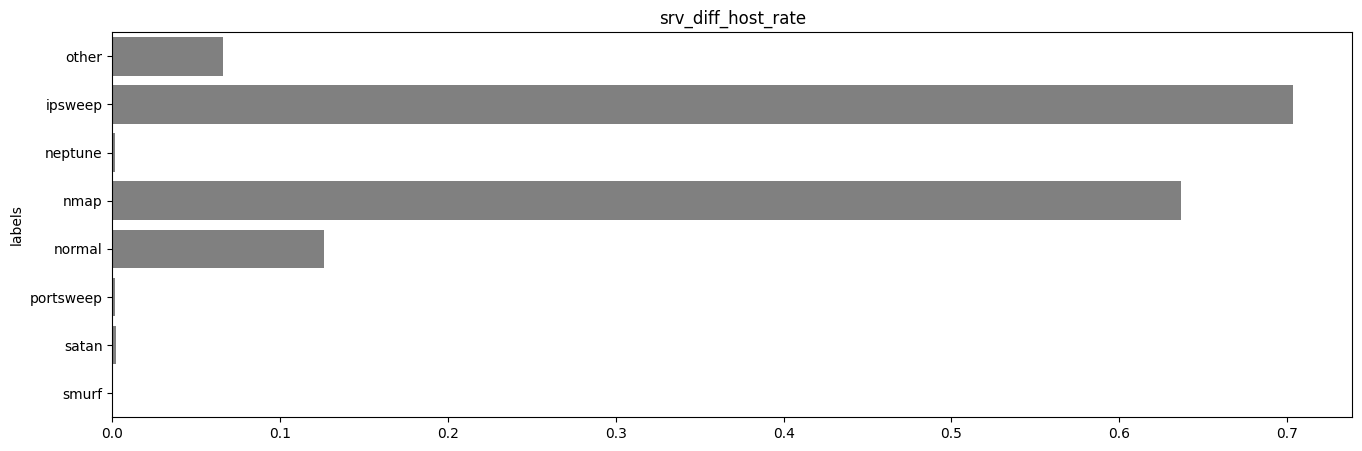

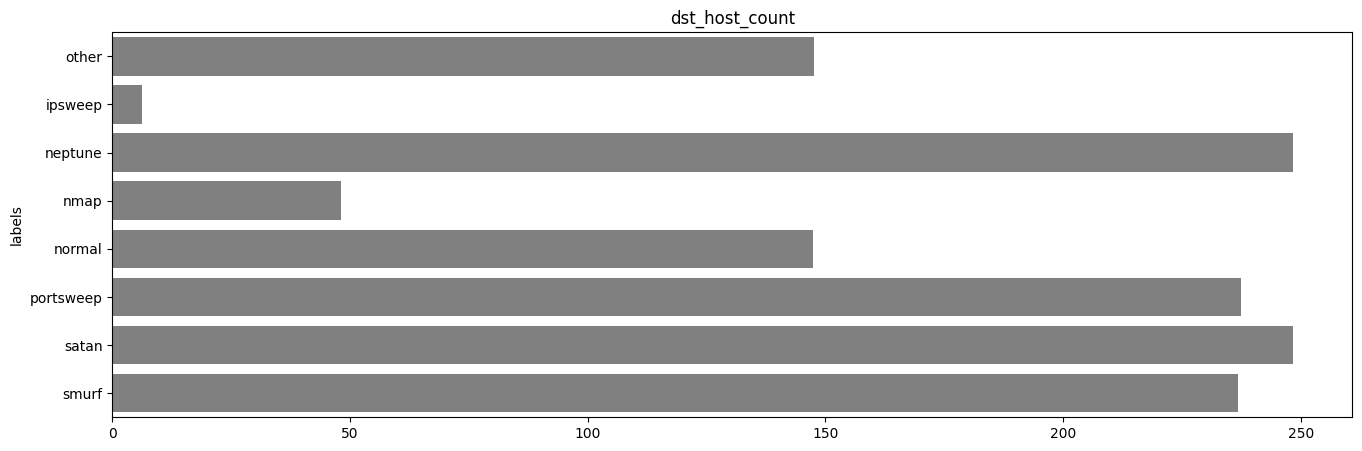

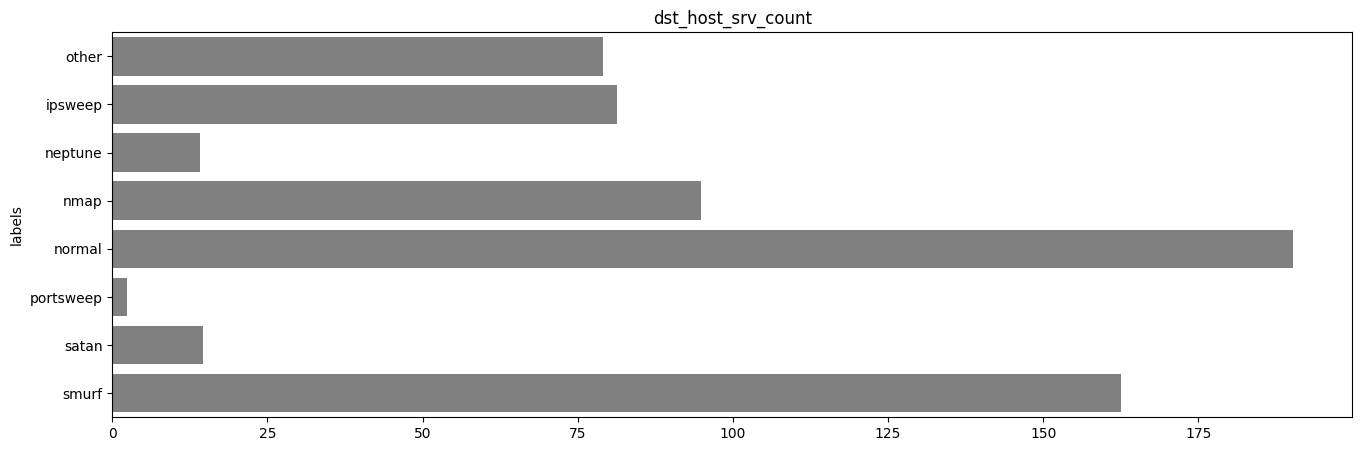

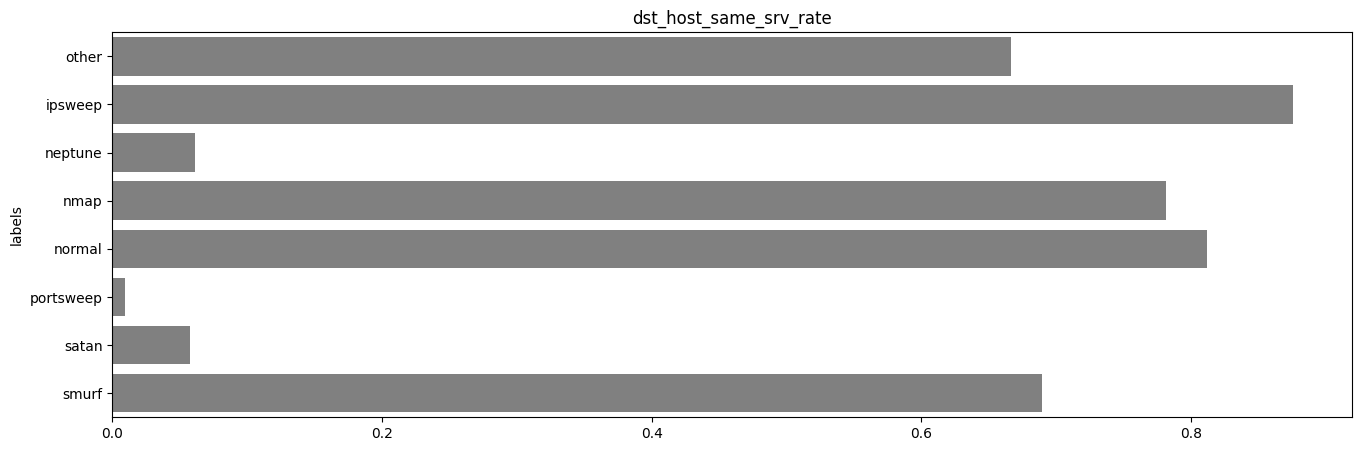

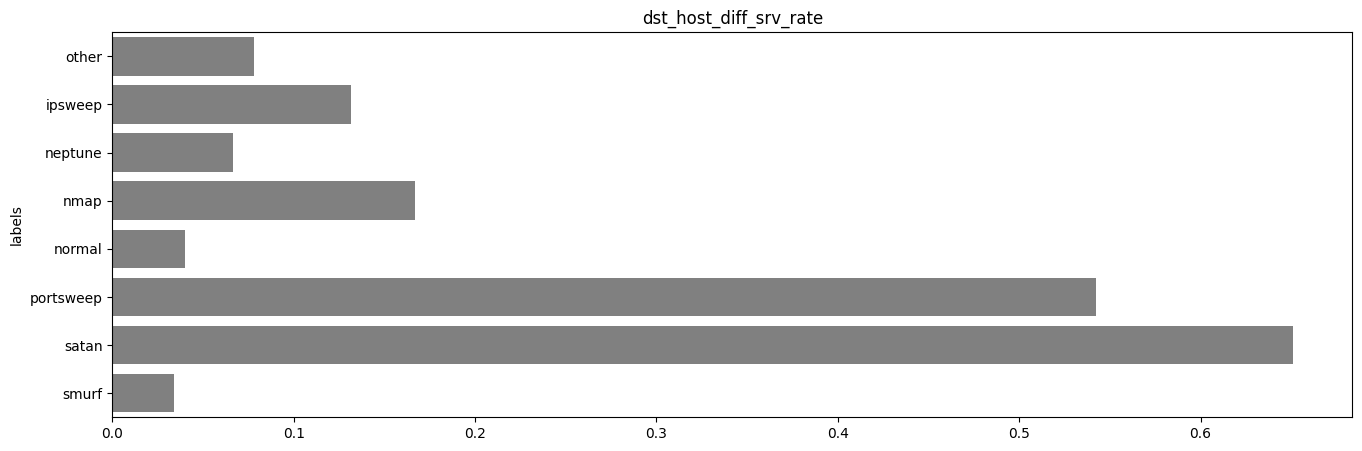

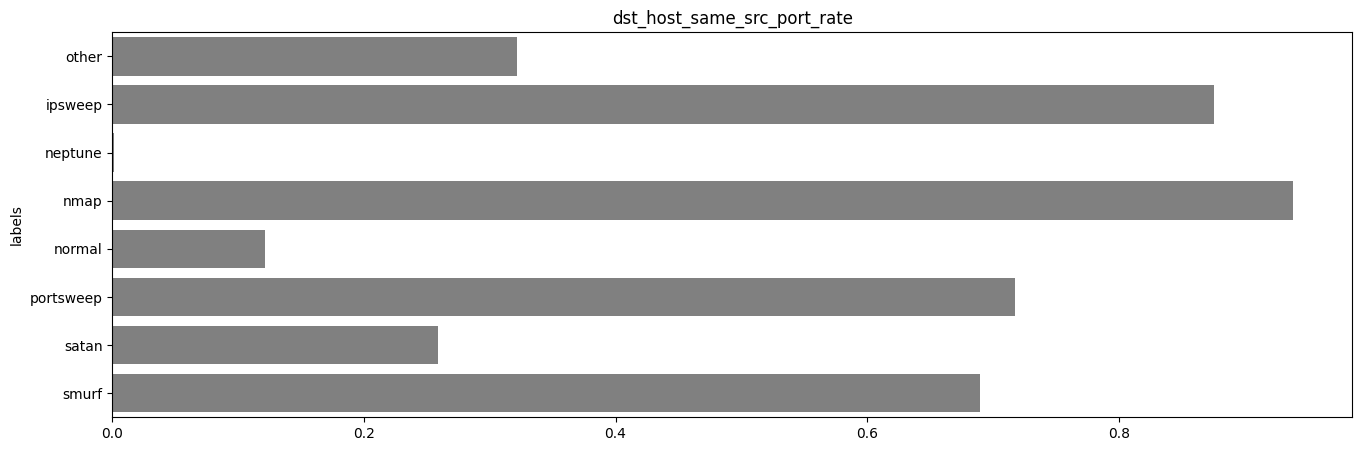

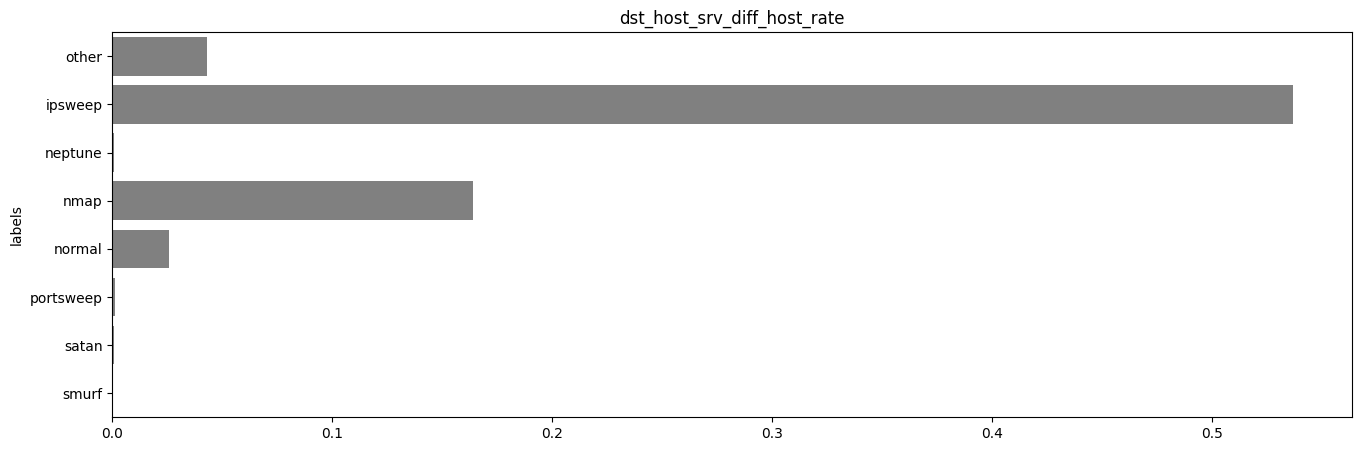

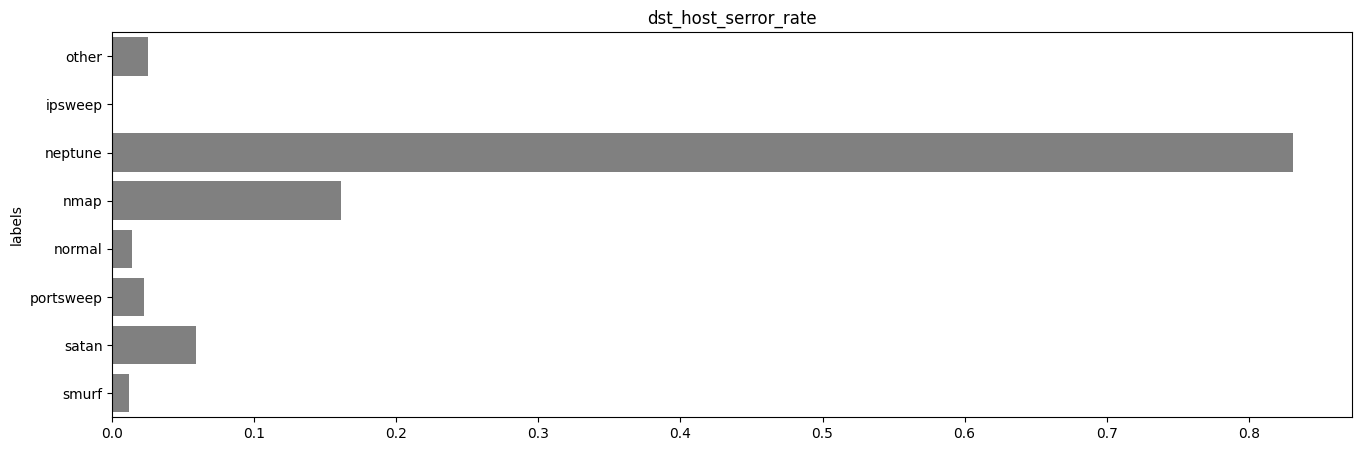

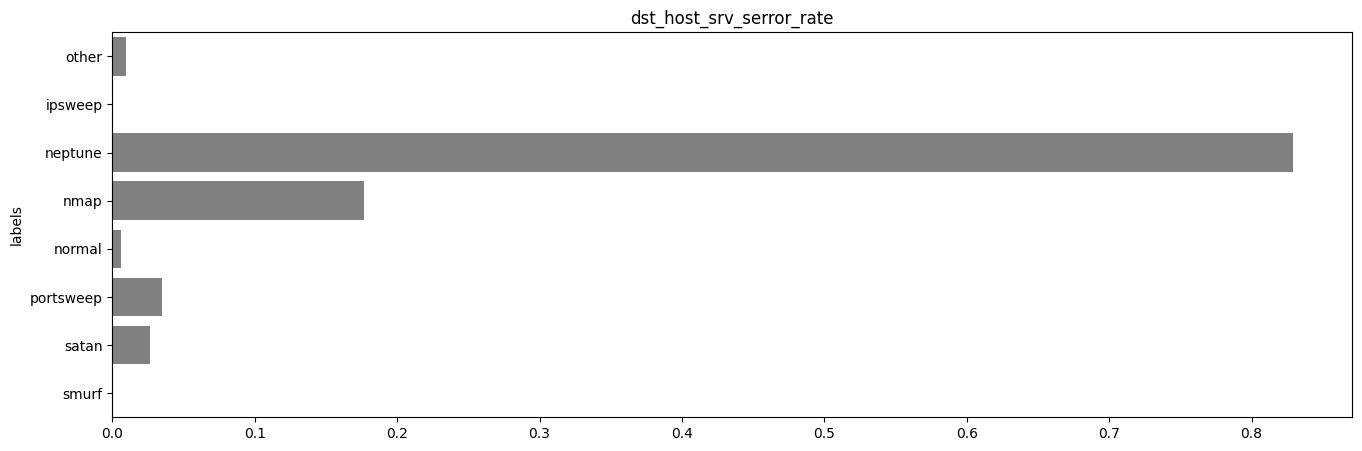

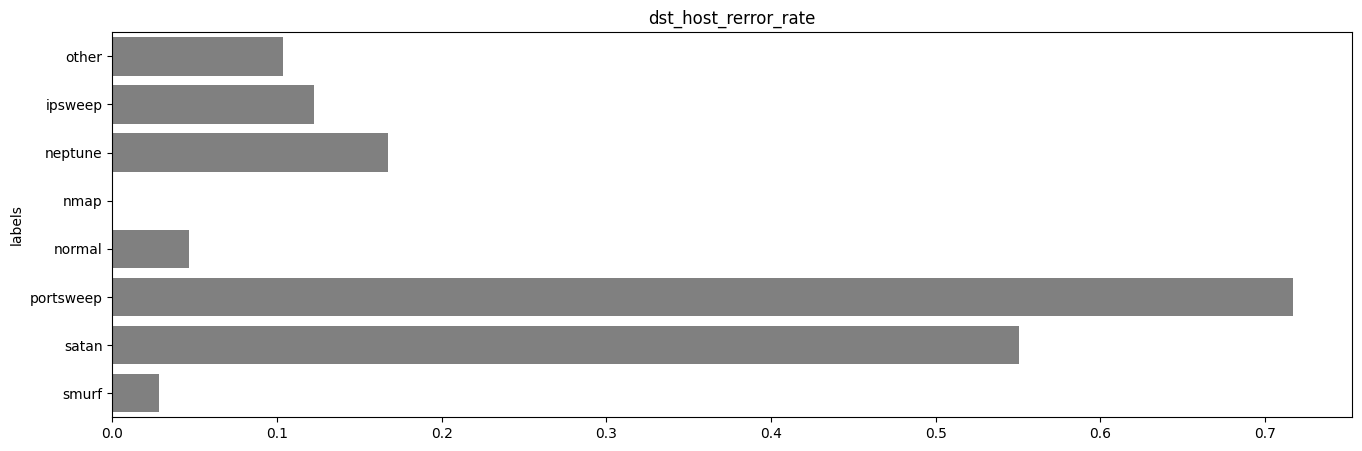

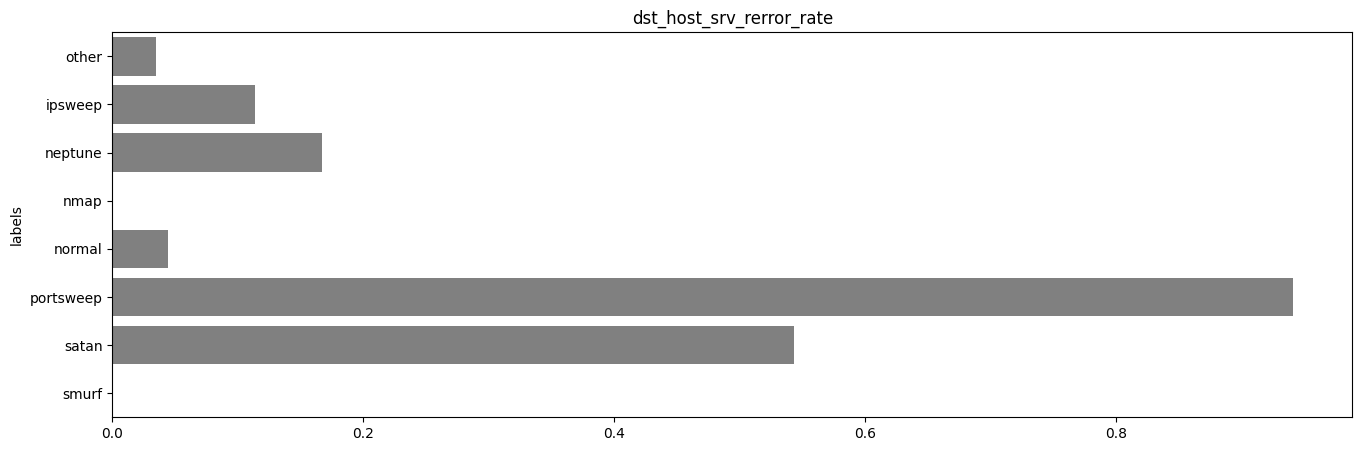

In [155]:
num_features = [i for i in train_df if i != 'labels' and train_df[i].dtype != 'category']
#feature means (per class)
group_mean = train_df.groupby(by='labels').mean()
for column in num_features:
    plt.figure(figsize=(16,5));
    sns.barplot(y=group_mean[column].squeeze().index, x=group_mean[column].squeeze().values,
                color='Gray');
    plt.title(column);

In [156]:
#Chuyển các thuộc tính kiểu category thành dạng số, sau đó lưu vào biến visual để trực quan hóa
category_change = ["protocol_type","service","flag","land","wrong_fragment","urgent","logged_in","root_shell","su_attempted","is_guest_login","labels"]
path = "/content/drive/MyDrive/Project/intruction_detection_project/kdd_train.csv"
tmp = pd.read_csv(path)
for i in category_change:
  col_name = tmp[i].unique()
  visual_df = tmp.replace(col_name,range(0,len(col_name)))


<ipython-input-157-3b912321c99b>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = df.corr().round(4)
<ipython-input-157-3b912321c99b>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_mat,dtype=np.bool)


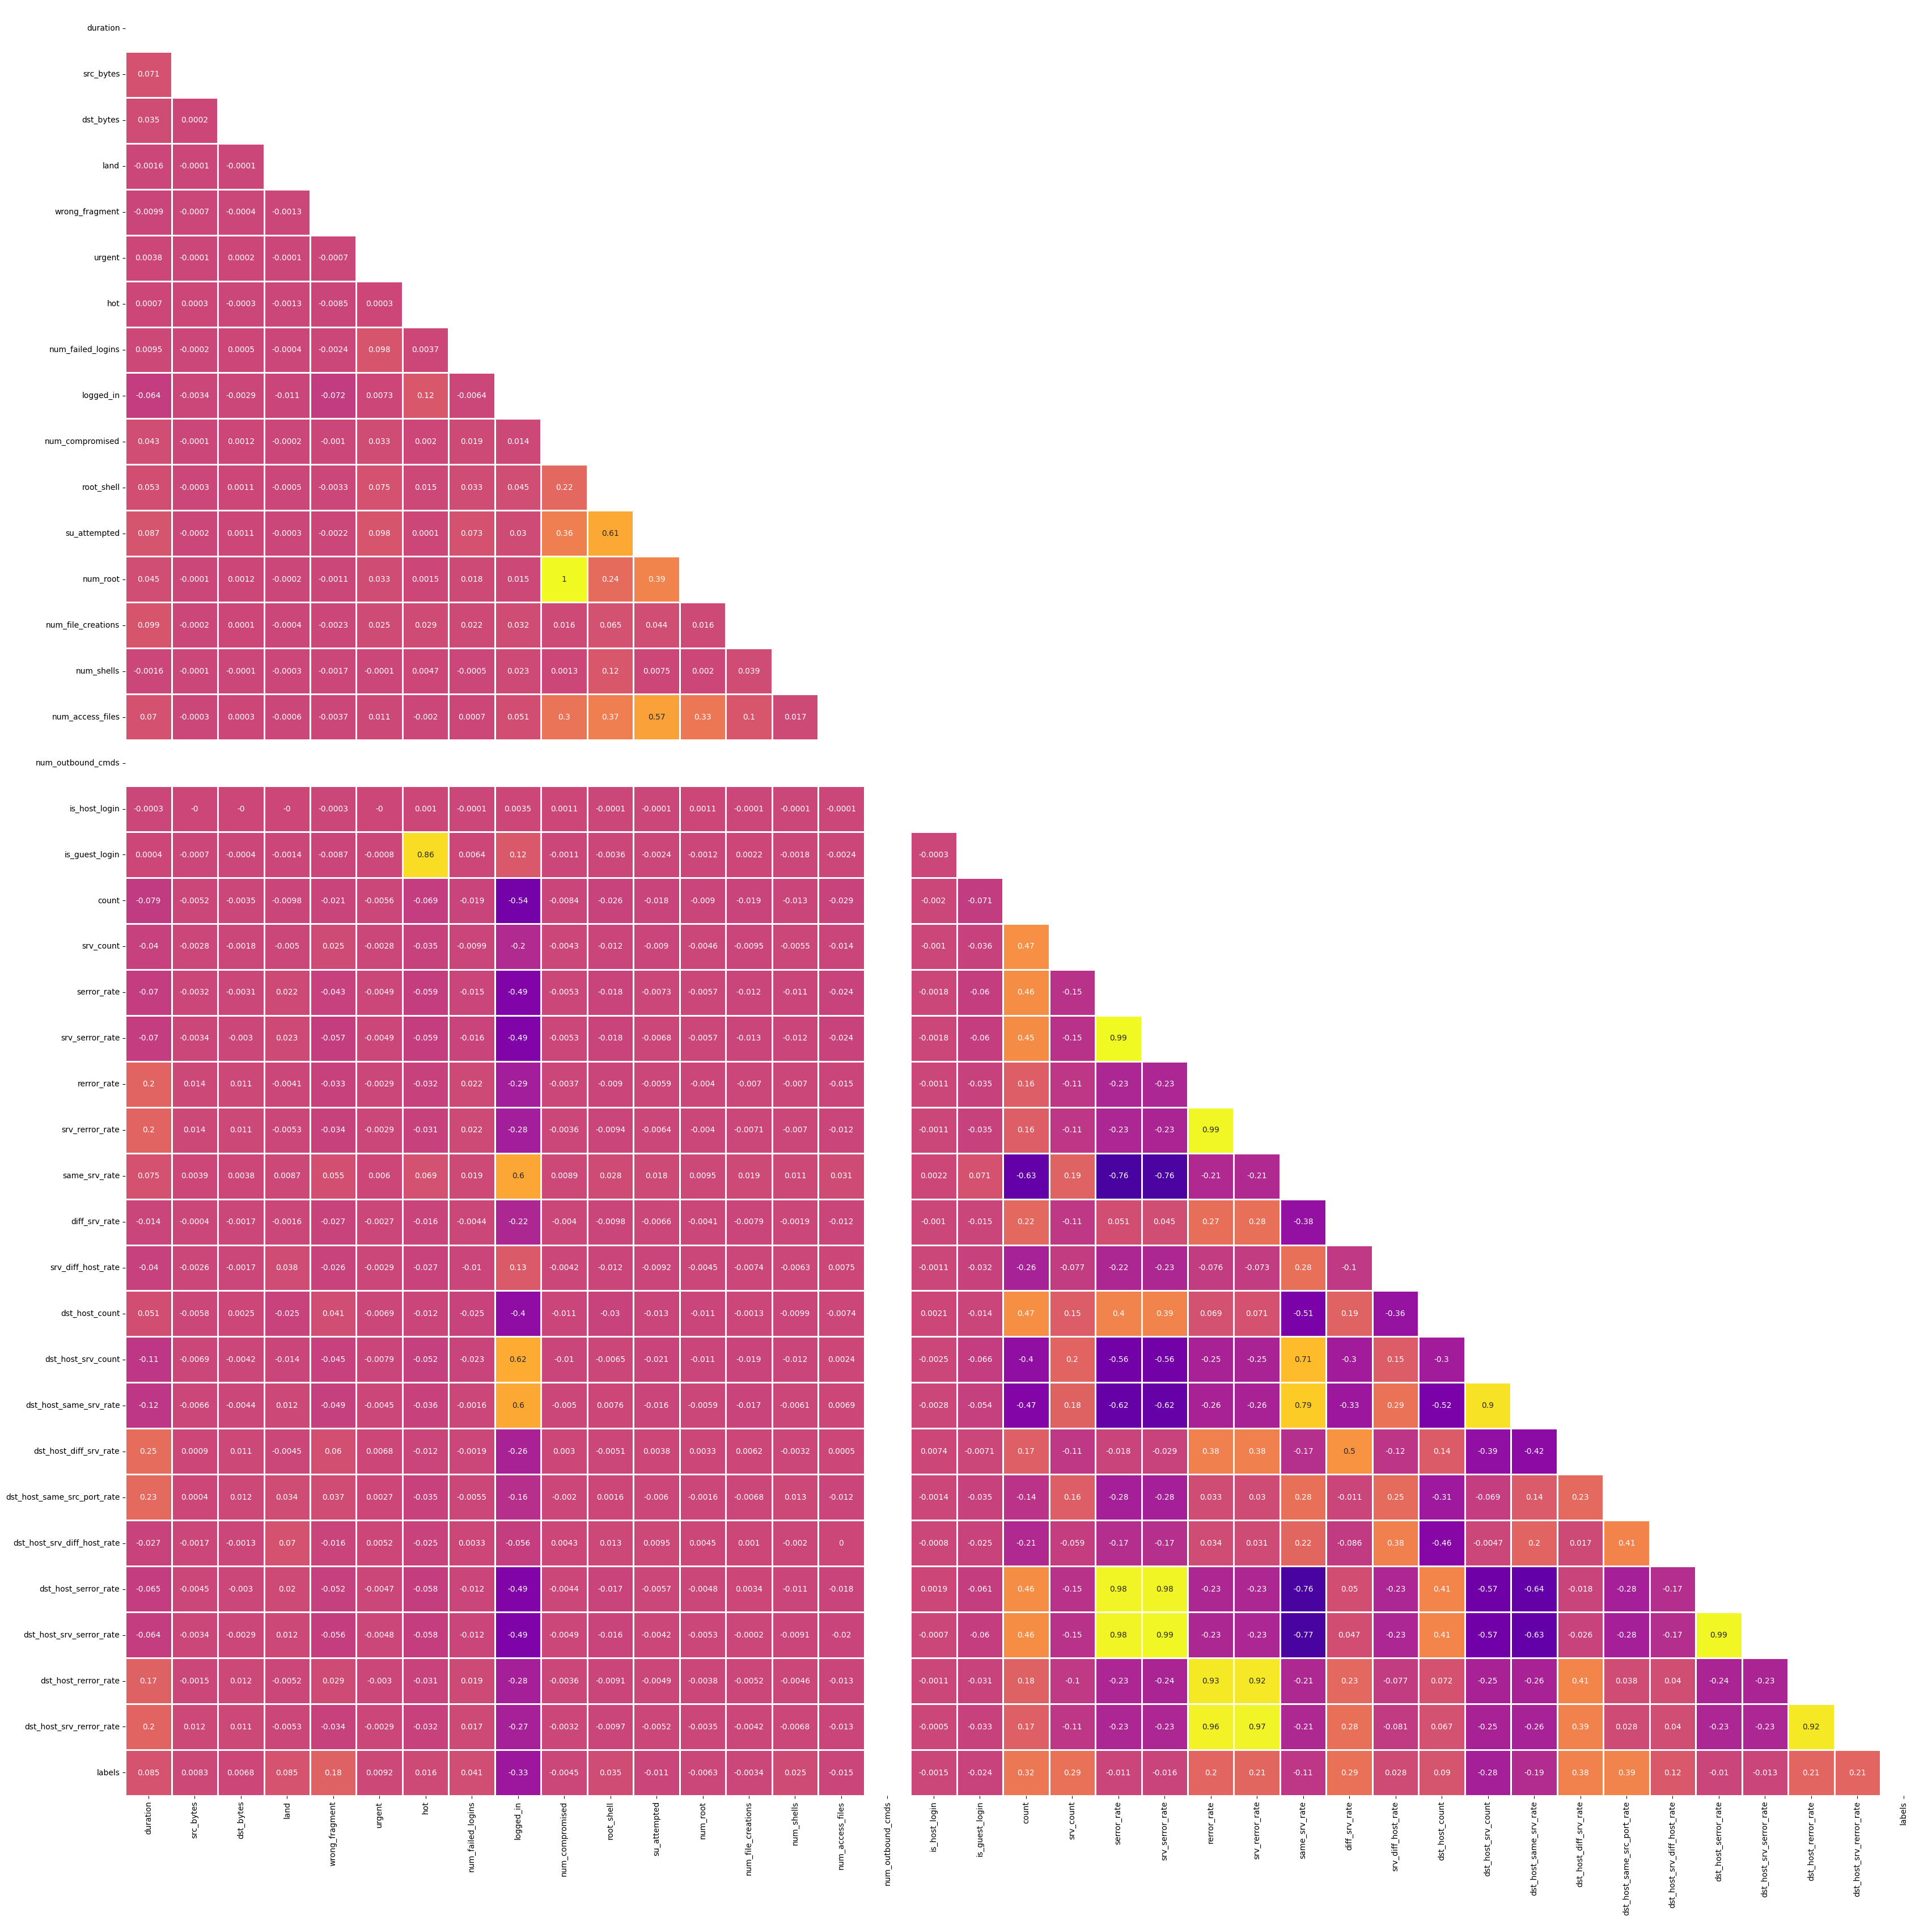

In [157]:
# biểu diễn sự tương quan của các cột qua biểu đồ nhiệt

def corrMat(df,id=False):

    corr_mat = df.corr().round(4)
    f, ax = plt.subplots(figsize=(41,41))
    mask = np.zeros_like(corr_mat,dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr_mat,mask=mask,vmin=-1,vmax=1,center=0,cmap='plasma',square=False,lw=2,annot=True,cbar=False);
    plt.show();
corrMat(visual_df)

In [158]:
#xóa vì num_root tương quan numcompromised đến 1
train_df = train_df.drop(labels ='num_root',axis = 1)
test_df = test_df.drop(labels ='num_root',axis = 1)

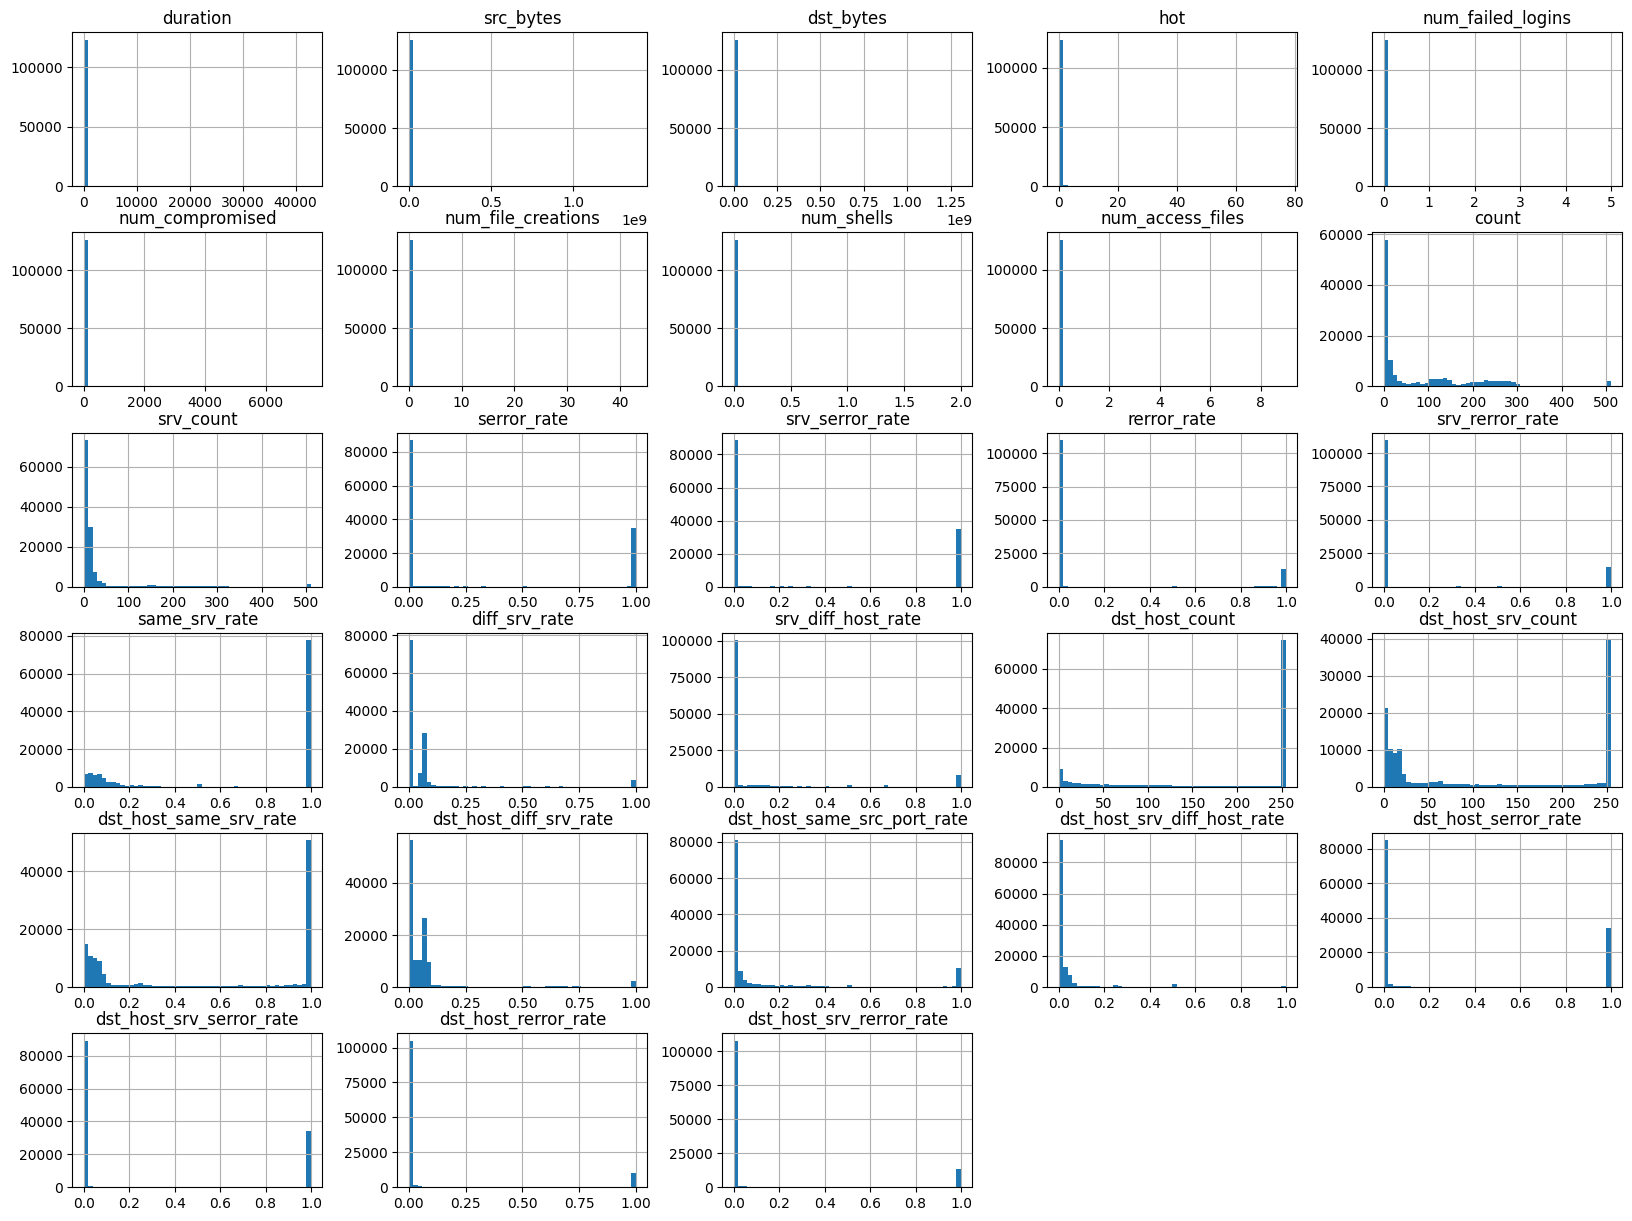

In [159]:
#sự phân phối giá trị của các thuộc tính dạng cột
train_df.hist(bins = 50, figsize=(20,15));

Text(0.5, 1.0, 'labels')

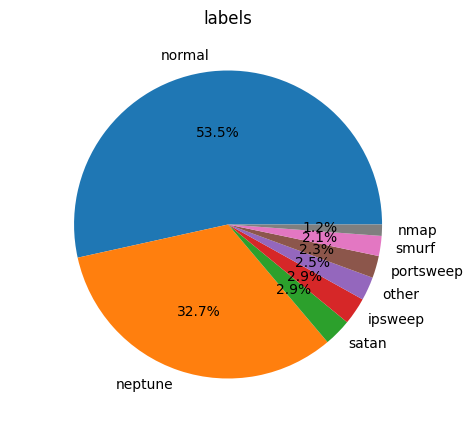

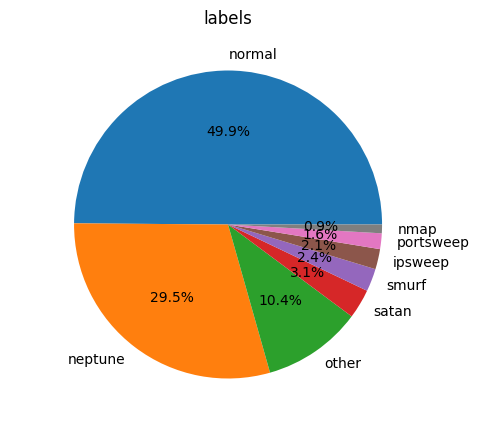

In [160]:
#train
grouped_df = (train_df.groupby('labels').size()/len(train_df))*100

grouped_df = grouped_df.sort_values(ascending=False)

fig = plt.figure(figsize=(5,5))
grouped_df.plot(kind = 'pie', autopct='%.1f%%')
plt.ylabel(" ", fontsize = 15)
plt.title("labels")
#test
grouped_df = (test_df.groupby('labels').size()/len(train_df))*100

grouped_df = grouped_df.sort_values(ascending=False)

fig = plt.figure(figsize=(5,5))
grouped_df.plot(kind = 'pie', autopct='%.1f%%')
plt.ylabel(" ", fontsize = 15)
plt.title("labels")

In [161]:
grouped_df = (train_df.groupby('labels').size()/len(train_df))*100
grouped_df = grouped_df.sort_values(ascending=False)
grouped_df

labels
normal       53.458281
neptune      32.716534
satan         2.883951
ipsweep       2.856961
other         2.471958
portsweep     2.326689
smurf         2.100450
nmap          1.185175
dtype: float64

In [162]:
train_df['labels'].unique()

['normal', 'neptune', 'other', 'ipsweep', 'portsweep', 'nmap', 'satan', 'smurf']
Categories (8, object): ['other', 'ipsweep', 'neptune', 'nmap', 'normal', 'portsweep', 'satan',
                         'smurf']

#4. Train model

In [163]:
feature_cols = [i for i in train_df if i != 'labels']
x = train_df[feature_cols]
y = train_df['labels']
X_test =test_df[feature_cols]
y_test = test_df['labels']


In [164]:
#preprocess pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [165]:
num_transformer = Pipeline(steps =[
    ('imputer', SimpleImputer(strategy = 'median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps =[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])


In [166]:
num_features = [i for i in train_df if i != 'labels' and train_df[i].dtype != 'category']
cat_features = [i for i in train_df if i != 'labels' and train_df[i].dtype == 'category']

In [167]:
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

In [168]:
preprocessor.fit(x)
preprocessor.fit(X_test)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['duration', 'src_bytes', 'dst_bytes', 'hot',
                                  'num_failed_logins', 'num_compromised',
                                  'num_file_creations', 'num_shells',
                                  'num_access_files', 'count', 'srv_count',
                                  'serror_rate', 'srv_serror_rate',
                                  'rerror_rate', 'srv_rerror_rate',
                                  'sa...
                                  'dst_host_serror_rate',
                                  'dst_host_srv_serror_rate',
                                  'dst_host_rerror_rate',
                                  'dst_host_srv_rerror_rate']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['protocol_type', 'service', 'flag', 'land',
                                  'wrong_fragment', 'urgent', 'logged_in',
                                  'root_shell', 'su_attempted',
                                  'is_guest_login'])])

In [169]:
X = preprocessor.transform(x)#X -> X_train, X_val
X_test =preprocessor.transform(X_test)

In [170]:
from sklearn.model_selection import train_test_split

In [171]:
X_train, X_val, y_train,y_val = train_test_split(X,y, test_size = 0.2)

In [172]:

from sklearn.metrics._plot.confusion_matrix import confusion_matrix
#binary classification
from sklearn.preprocessing import PolynomialFeatures
#sklearn model
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score,classification_report, confusion_matrix

Logistic Regression

In [173]:
log_reg = LogisticRegression(solver = 'liblinear',max_iter = 1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [174]:
log_reg.score(X_val, y_val)

0.9804723159357015

In [175]:
y_pred = log_reg.predict(X_val)

In [176]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score, mean_absolute_error, make_scorer

# Showing Confusion Matrix

def plot_cm(y_true, y_pred, title):
    figsize=(14,14)
    #y_pred = y_pred.astype(int)
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    plt.title(title)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)

0.9383538114205271

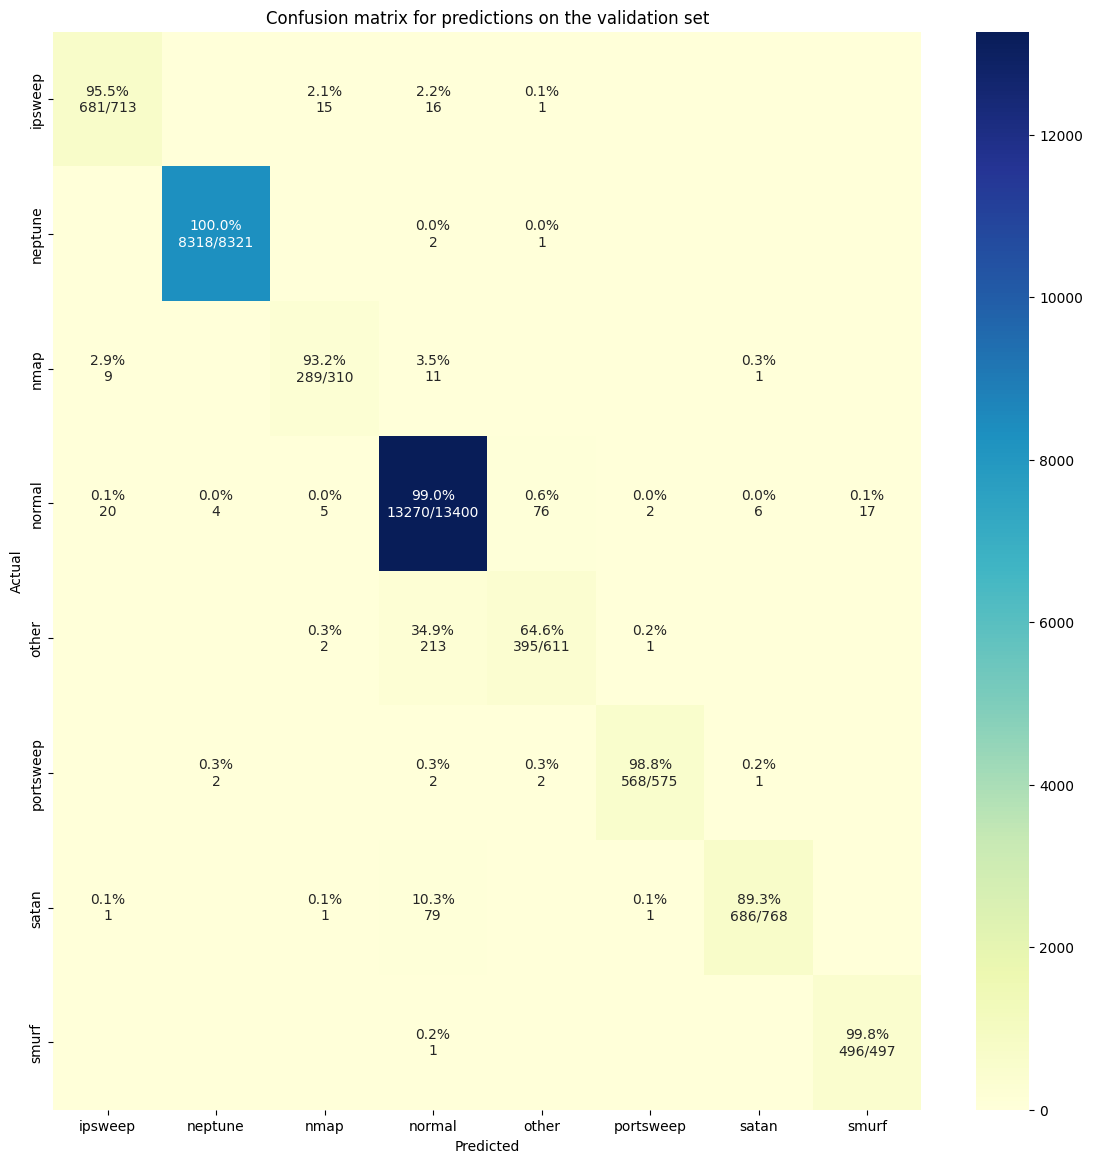

In [177]:
plot_cm(y_val,y_pred, 'Confusion matrix for predictions on the validation set')
f1_score(y_val, y_pred, average = 'macro')

In [178]:
y_pred = log_reg.predict(X_test)

0.847028472167569

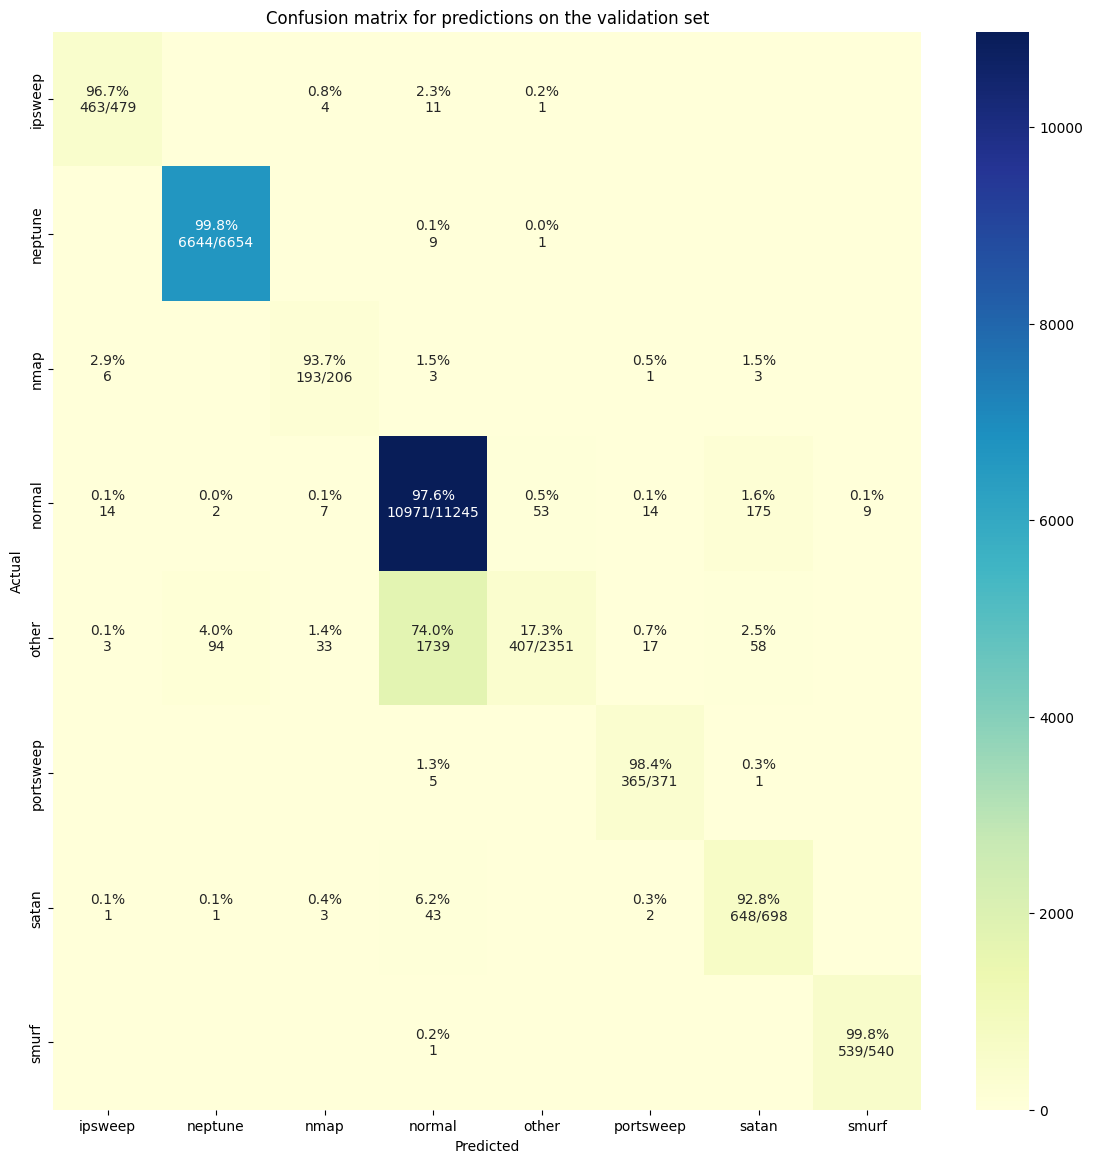

In [179]:
plot_cm(y_test,y_pred, 'Confusion matrix for predictions on the validation set')
f1_score(y_test, y_pred, average = 'macro')

Linear Regression

In [180]:
from sklearn.linear_model import LinearRegression

In [181]:
lin_reg = LinearRegression()

In [182]:
col_name = y_train.unique()
y_train = y_train.replace(col_name,range(0,len(col_name)))


In [183]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [184]:
log_reg.score(X_val, y_val)

0.9804723159357015

#Cắt bớt data 1

In [236]:
cut_train_df = train_df.copy()
cut_test_df = test_df.copy()

In [237]:
cut_train_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune
125969,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune


In [238]:
#tách label normal và neptune trong tập train
cut_train__normal_slice = cut_train_df[cut_train_df['labels']=='normal'].copy()
cut_train__neptune_slice = cut_train_df[cut_train_df['labels']=='neptune'].copy()


In [239]:
random_state =42
#lấy ngẫu nhiên 5000 dòng dữ liệu từ 2 bảng normal và neptune của train
proc_train_normal_sampled = cut_train__normal_slice.sample(n=4000, random_state=random_state)
proc_train_neptune_sampled = cut_train__neptune_slice.sample(n=5000, random_state=random_state)

In [240]:
# xóa dữ liệu có label normal và nepture trong bảng nerual_train__normal_slice
cut_train__normal_slice.drop(cut_train__normal_slice.loc[cut_train__normal_slice['labels']=='normal'].index, inplace=True)
cut_train__normal_slice.drop(cut_train__normal_slice.loc[cut_train__normal_slice['labels']=='neptune'].index, inplace=True)

In [241]:
cut_train_df.drop(cut_train_df.loc[cut_train_df['labels']=='normal'].index, inplace=True)
cut_train_df.drop(cut_train_df.loc[cut_train_df['labels']=='neptune'].index, inplace=True)

In [242]:
#nối lại vào bảng với các giá trị đã cắt
cut_train_df = pd.concat([cut_train_df, proc_train_normal_sampled, proc_train_neptune_sampled], axis=0)


Text(0.5, 1.0, 'labels')

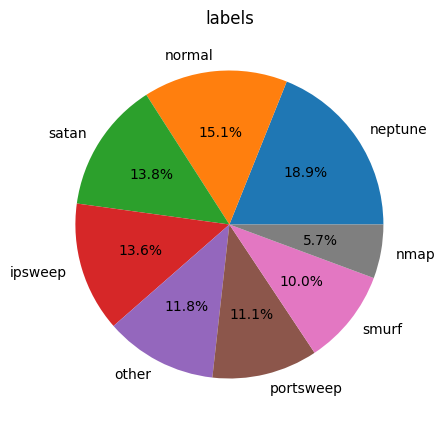

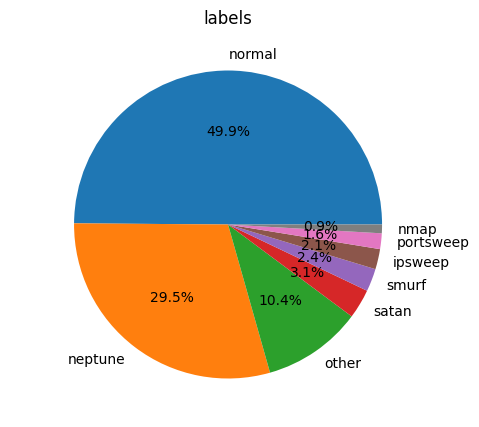

In [260]:
#train
grouped_df = (cut_train_df.groupby('labels').size()/len(cut_train_df))*100

grouped_df = grouped_df.sort_values(ascending=False)

fig = plt.figure(figsize=(5,5))
grouped_df.plot(kind = 'pie', autopct='%.1f%%')
plt.ylabel(" ", fontsize = 15)
plt.title("labels")
#test
grouped_df = (test_df.groupby('labels').size()/len(cut_train_df))*100

grouped_df = grouped_df.sort_values(ascending=False)

fig = plt.figure(figsize=(5,5))
grouped_df.plot(kind = 'pie', autopct='%.1f%%')
plt.ylabel(" ", fontsize = 15)
plt.title("labels")

In [243]:
feature_cols = [i for i in train_df if i != 'labels']
x = cut_train_df[feature_cols]
y = cut_train_df['labels']
X_test =cut_test_df[feature_cols]
y_test = cut_test_df['labels']


In [244]:
#preprocess pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [245]:
num_transformer = Pipeline(steps =[
    ('imputer', SimpleImputer(strategy = 'median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps =[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])


In [246]:
num_features = [i for i in train_df if i != 'labels' and train_df[i].dtype != 'category']
cat_features = [i for i in train_df if i != 'labels' and train_df[i].dtype == 'category']

In [247]:
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

In [248]:
preprocessor.fit(x)
preprocessor.fit(X_test)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['duration', 'src_bytes', 'dst_bytes', 'hot',
                                  'num_failed_logins', 'num_compromised',
                                  'num_file_creations', 'num_shells',
                                  'num_access_files', 'count', 'srv_count',
                                  'serror_rate', 'srv_serror_rate',
                                  'rerror_rate', 'srv_rerror_rate',
                                  'sa...
                                  'dst_host_serror_rate',
                                  'dst_host_srv_serror_rate',
                                  'dst_host_rerror_rate',
                                  'dst_host_srv_rerror_rate']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['protocol_type', 'service', 'flag', 'land',
                                  'wrong_fragment', 'urgent', 'logged_in',
                                  'root_shell', 'su_attempted',
                                  'is_guest_login'])])

In [249]:
X = preprocessor.transform(x)#X -> X_train, X_val
X_test =preprocessor.transform(X_test)

In [250]:
from sklearn.model_selection import train_test_split

In [251]:
X_train, X_val, y_train,y_val = train_test_split(X,y, test_size = 0.2)

In [252]:

from sklearn.metrics._plot.confusion_matrix import confusion_matrix
#binary classification
from sklearn.preprocessing import PolynomialFeatures
#sklearn model
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score,classification_report, confusion_matrix

Logistic Regression

In [253]:
log_reg = LogisticRegression(solver = 'liblinear',max_iter = 1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [254]:
log_reg.score(X_val, y_val)

0.9680166540499622

In [255]:
y_pred = log_reg.predict(X_val)

In [256]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score, mean_absolute_error, make_scorer

# Showing Confusion Matrix

def plot_cm(y_true, y_pred, title):
    figsize=(14,14)
    #y_pred = y_pred.astype(int)
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    plt.title(title)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)

0.9659205142577472

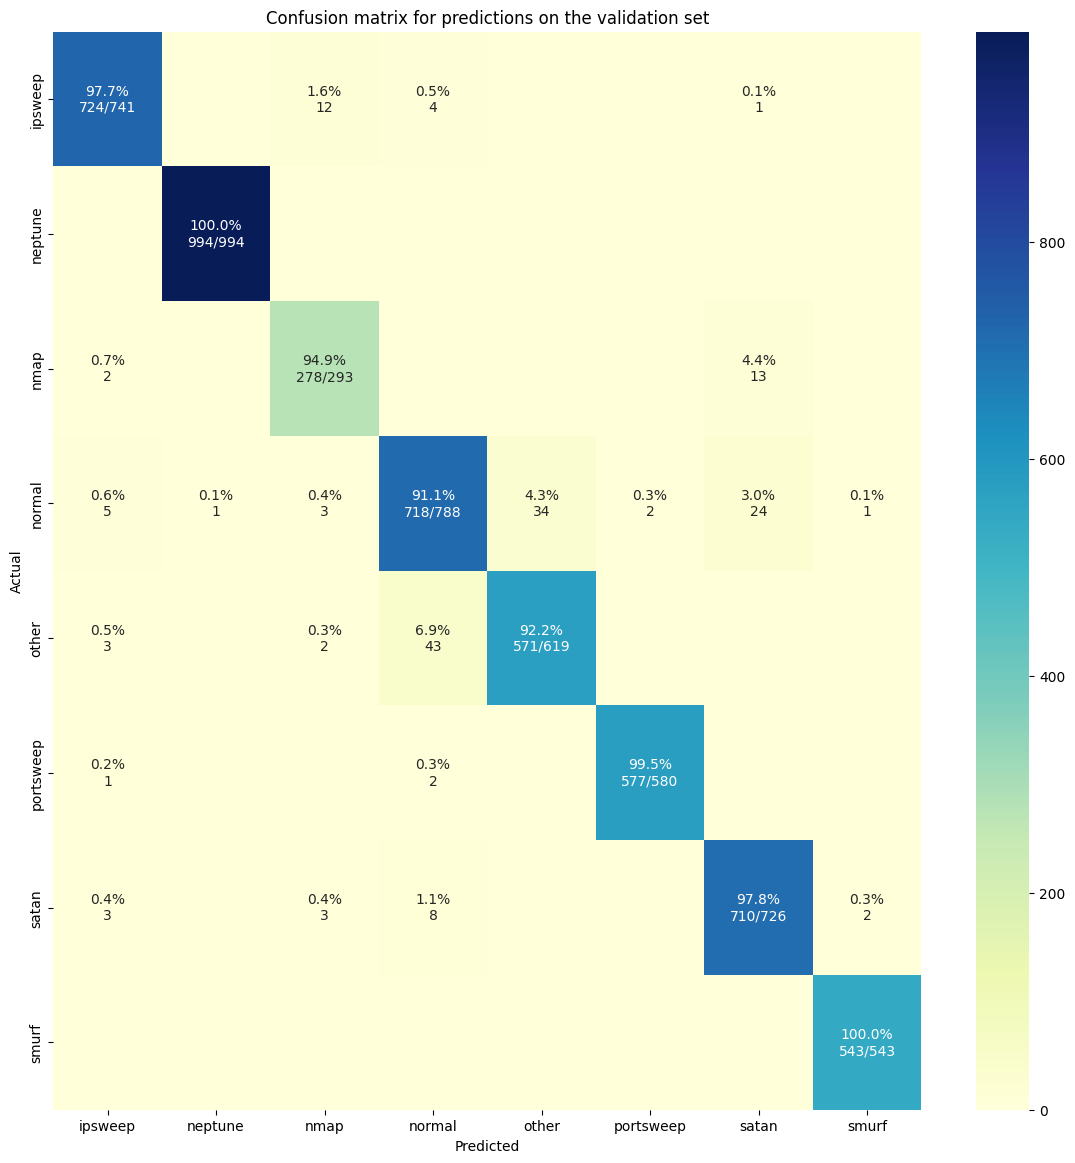

In [257]:
plot_cm(y_val,y_pred, 'Confusion matrix for predictions on the validation set')
f1_score(y_val, y_pred, average = 'macro')

In [258]:
y_pred = log_reg.predict(X_test)

0.8238505999090177

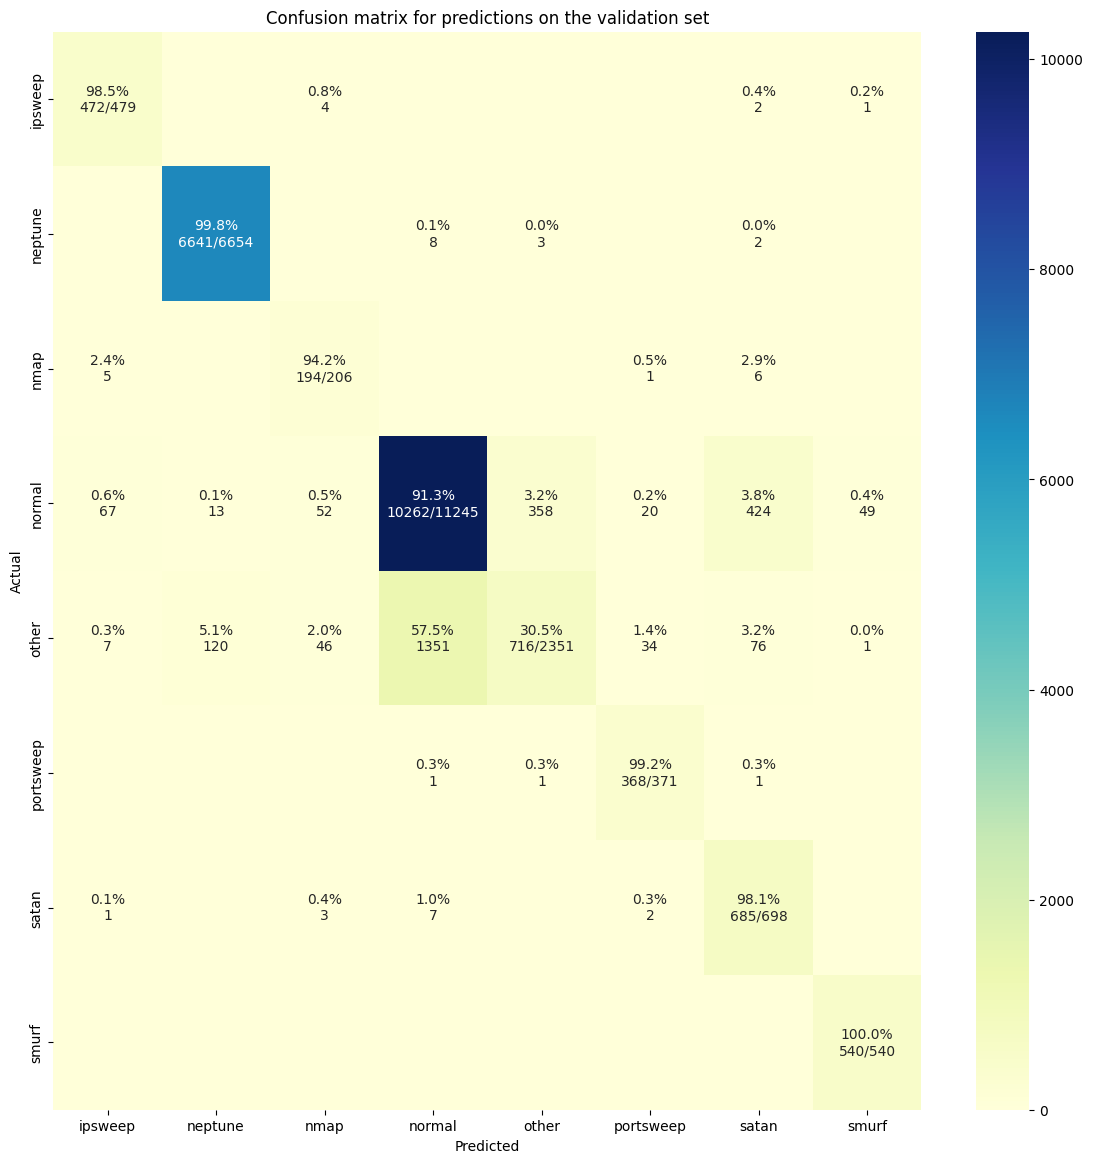

In [259]:
plot_cm(y_test,y_pred, 'Confusion matrix for predictions on the validation set')
f1_score(y_test, y_pred, average = 'macro')